<a href="https://colab.research.google.com/github/Navneet2409/credit-card-default-prediction/blob/main/Credit_Card_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets.

A credit card issuer based in Taiwan wants to learn more about how likely its customers are to default on their payments and the main factors that influence this probability. The issuer's decisions regarding who to issue a credit card to and what credit limit to offer would be informed by this information. The issuer's future strategy, including plans to offer targeted credit products to their customers, would be informed by a better understanding of their current and potential customers as a result of this.

**Our objective**
* To determine the main factors that influence the likelihood of defaulting on a credit card.
* To determine the likelihood that Bank customers will default on their credit card payments.


## ***Let's Begin !***

## ***1. Know Your Data***

#### Import Libraries

In [ ]:
# Import Libraries and modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy.stats import *

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from xgboost import XGBRFClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer


import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score

import warnings
warnings.filterwarnings("ignore")

#### Dataset Loading

In [ ]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the Default of Credit Card Clients data set from the drive
clients_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Credit Card Default Prediction - Navneet Keshri/default of credit card clients.csv',header = 1)

#### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns 
clients_df.shape

(30000, 25)

#### Dataset Information

In [ ]:
# Dataset Info
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We have 25 columns. All of them are numerical (int64 data type)

#### Duplicate Values

What is the significance of eliminating duplicate records from my data?

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or data collection procedures. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [ ]:
# Checking Duplicate Values
value=len(clients_df[clients_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


After counting duplicate values in the above data, we discovered that none is present.

#### Missing Values/Null Values

Why is it necessary to deal with missing values

There are frequently a lot of missing values in the actual data. Data corruption or failure to record data are potential causes of missing values. During the preprocessing of the dataset, the handling of missing data is very important because many machine learning algorithms do not support missing values. Because of this, we first check for missing values.

In [ ]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


From the above commands, we noticed that every column has 0 number of rows null values. This seems to be clean data and there is no missing data in any of the 'rows and columns'.

#### What did you know about your dataset?

The dataset given is a dataset from Banking industry, and we have to analysis the credit default of customers and the insights behind it.

Predicting customer loan default is a job of proactively identifying customers most likely to default on loan payments. Typically, this is accomplished by dynamically analyzing relevant customer data and actions.

In the dataset we have 30000 number of rows and 25 columns. There are no mising values and duplicate values in the dataset.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
clients_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


####  Variables Description

In [ ]:
clients_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


* **ID	:** ID of each client
* **LIMIT_BAL	:** Amount of given credit in NT dollars 
* **SEX	:** Gender (1=male, 2=female)
* **EDUCATION	:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE	:** Marital status (1=married, 2=single, 3=others)
* **AGE	:** Age in years
* **PAY_0	:** Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2	:** Repayment status in August, 2005 (scale same as above)
* **PAY_3	:** Repayment status in July, 2005 (scale same as above)
* **PAY_4	:** Repayment status in June, 2005 (scale same as above)
* **PAY_5	:** Repayment status in May, 2005 (scale same as above)
* **PAY_6	:** Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1	:** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2	:** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3	:** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4	:** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5	:** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6	:** Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1	:** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2	:** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3	:** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4	:** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5	:** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6	:** Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month	:** Default payment (1=yes, 0=no)

#### Check Unique Values for each variable.

In [ ]:
# print the unique value
clients_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in clients_df.columns.tolist():
  print("No. of unique values in ",i,"is",clients_df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

##***3. EDA and Data Wrangling***

#### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = clients_df.copy()

#### Renaming some columns 

In [ ]:
# Changing inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DP_NEXT_MONTH'
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DP_NEXT_MONTH'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

#### Categorical data conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_1          30000 non-null  int64
 7   PAY_2          30000 non-null  int64
 8   PAY_3          30000 non-null  int64
 9   PAY_4          30000 non-null  int64
 10  PAY_5          30000 non-null  int64
 11  PAY_6          30000 non-null  int64
 12  BILL_AMT1      30000 non-null  int64
 13  BILL_AMT2      30000 non-null  int64
 14  BILL_AMT3      30000 non-null  int64
 15  BILL_AMT4      30000 non-null  int64
 16  BILL_AMT5      30000 non-null  int64
 17  BILL_AMT6      30000 non-null  int64
 18  PAY_AMT1       30000 non-null  int64
 19  PAY_

Although they appear to be of the integer type, 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE' and 'DP_NEXT_MONTH' columns are actually of the category type. As a result, if we do not alter this data structure, we run the risk of being deceived by the values during subsequent analyses.

Age is a integer data type not a categorical data type,

In [ ]:
# Change the int64 column into catagory column
cols=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in cols:
  df[col]= df[col].astype('category')

In [ ]:
# let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  category
 3   EDUCATION      30000 non-null  category
 4   MARRIAGE       30000 non-null  category
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  category
 7   PAY_2          30000 non-null  category
 8   PAY_3          30000 non-null  category
 9   PAY_4          30000 non-null  category
 10  PAY_5          30000 non-null  category
 11  PAY_6          30000 non-null  category
 12  BILL_AMT1      30000 non-null  int64   
 13  BILL_AMT2      30000 non-null  int64   
 14  BILL_AMT3      30000 non-null  int64   
 15  BILL_AMT4      30000 non-null  int64   
 16  BILL_AMT5      30000 non-null  int64   
 17  BILL_AMT6      30000 non-null  

#### Checking our dependent variable

In [ ]:
# 'DP_NEXT_MONTH' is the dependent variable.
# It is a binary variable, that should take only two values (Yes = 1, No = 0).

df['DP_NEXT_MONTH'].value_counts()

0    23364
1     6636
Name: DP_NEXT_MONTH, dtype: int64

Most of the data is 'DP_NEXT_MONTH' = 0 (do not default next month)

The column may need to be rebalanced.

#### Checking categorical columns


In [ ]:
# 1. 'SEX'
# Gender (1 = male; 2 = female)
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

No data wrangling is needed for column 'SEX'

In [ ]:
# 2. 'EDUCATION'
# Education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

'EDUCATION' column has 4 = others, 5= unknown, 6 =unknown and 0 = unknown value we need to group all unknow into 4 = Others

In [ ]:
def reassign_edu(x):
  accepted_values = [1,2,3,4]
  if x in accepted_values:
    output = x
  else:
    output = 4
  return output

In [ ]:
df['EDUCATION'] = df['EDUCATION'].apply(reassign_edu)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Now this seems good and 'EDUCATION' data has been wrangled.

In [ ]:
# 3. 'MARRIAGE'
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

No data wrangling is needed for column 'MARRIAGE'

'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6' are described as follows: 

(-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [ ]:
# 4. 'PAY_1'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_1'].value_counts()

0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_1, dtype: int64

No data wrangling is needed for 'PAY_1'.

In [ ]:
# 5. 'PAY_2'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_2'].value_counts()

0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64

No data wrangling is needed for 'PAY_2'

In [ ]:
# 6. 'PAY_3'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_3'].value_counts()

0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64

No data wrangling is needed for 'PAY_3'

In [ ]:
# 7. 'PAY_4'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_4'].value_counts()

0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64

No data wrangling is needed for 'PAY_4'

In [ ]:
# 8. 'PAY_5'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_5'].value_counts()

0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64

No data wrangling is needed for 'PAY_5'

In [ ]:
# 9. 'PAY_6'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_6'].value_counts()

0     16286
-1     5740
-2     4895
2      2766
3       184
4        49
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64

No data wrangling is needed for 'PAY_6'

#### Checking Numerical columns


Creating a function to understand numerical columns

In [ ]:
def inspect_num_column(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot and summary statistics'''

  # Display boxplot and histogram/kde.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()

  # Print summary statistics.
  print('Min: \t\t\t {:,.0f}'.format(input_series.min()))
  print('Lower Quartile: \t {:,.0f}'.format(input_series.quantile([.25]).iloc[0]))
  print('median: \t\t {:,.0f}'.format(input_series.median()))
  print('mean: \t\t\t {:,.0f}'.format(input_series.mean()))
  print('Upper Quartile: \t {:,.0f}'.format(input_series.quantile([.75]).iloc[0]))                                    
  print('max: \t\t\t {:,.0f}'.format(input_series.max()))
  print('\n')
  print('Skew: \t\t\t {:,.2f}'.format(input_series.skew()))
  print('Kurtosis: \t\t {:,.2f}'.format(input_series.kurtosis()))

  return None

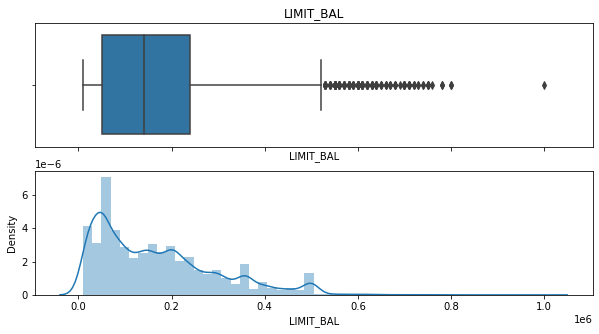

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 167,484
Upper Quartile: 	 240,000
max: 			 1,000,000


Skew: 			 0.99
Kurtosis: 		 0.54


In [ ]:
# 1. 'LIMIT_BAL'
# Amount of the given credit (NT dollar)
input_series = df['LIMIT_BAL']
inspect_num_column(input_series)

The column may need to be rebalanced.

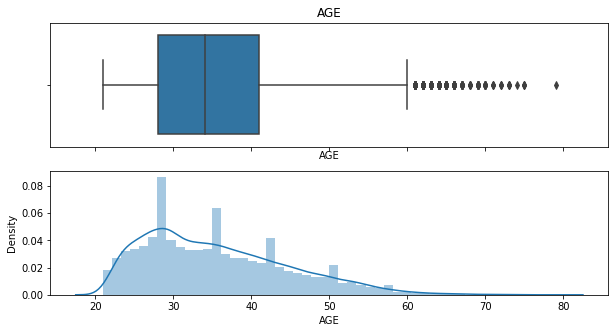

Min: 			 21
Lower Quartile: 	 28
median: 		 34
mean: 			 35
Upper Quartile: 	 41
max: 			 79


Skew: 			 0.73
Kurtosis: 		 0.04


In [ ]:
# 2. 'AGE'
# Amount of the given credit (NT dollar)
input_series = df['AGE']
inspect_num_column(input_series)

No data wrangling is needed for 'AGE'

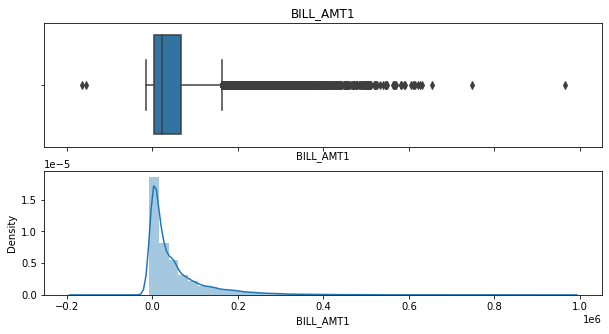

Min: 			 -165,580
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 51,223
Upper Quartile: 	 67,091
max: 			 964,511


Skew: 			 2.66
Kurtosis: 		 9.81


In [ ]:
# 3. 'BILL_AMT1'
# Amount of bill statement in September, 2005 (NT dollar)
input_series = df['BILL_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

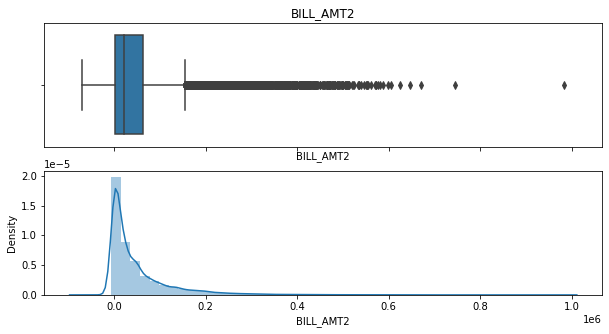

Min: 			 -69,777
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 49,179
Upper Quartile: 	 64,006
max: 			 983,931


Skew: 			 2.71
Kurtosis: 		 10.30


In [ ]:
# 4. 'BILL_AMT2'
# Amount of bill statement in August, 2005 (NT dollar)
input_series = df['BILL_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

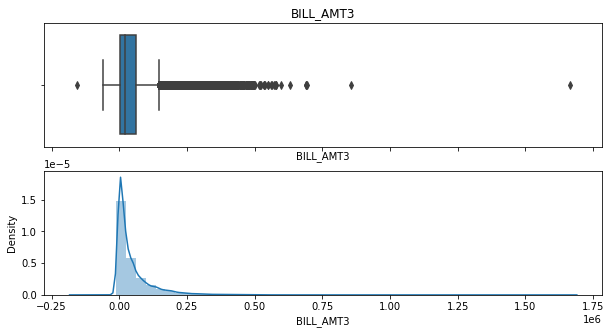

Min: 			 -157,264
Lower Quartile: 	 2,666
median: 		 20,088
mean: 			 47,013
Upper Quartile: 	 60,165
max: 			 1,664,089


Skew: 			 3.09
Kurtosis: 		 19.78


In [ ]:
# 5. 'BILL_AMT3'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

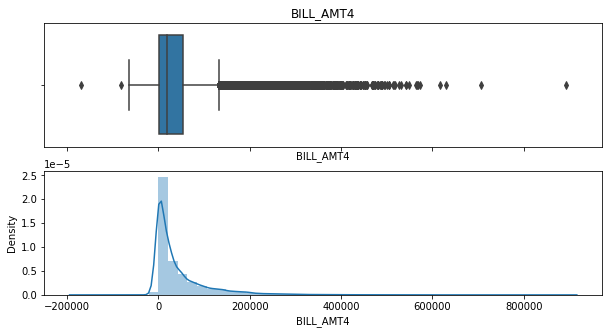

Min: 			 -170,000
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 43,263
Upper Quartile: 	 54,506
max: 			 891,586


Skew: 			 2.82
Kurtosis: 		 11.31


In [ ]:
# 6. 'BILL_AMT4'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

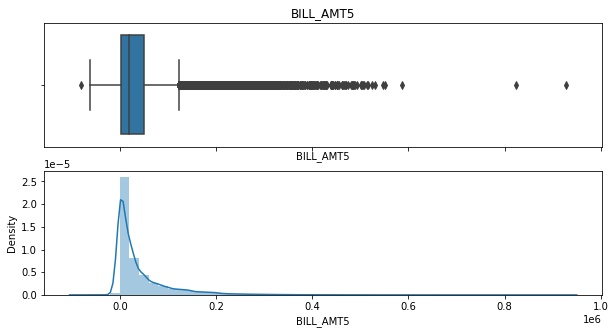

Min: 			 -81,334
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 40,311
Upper Quartile: 	 50,190
max: 			 927,171


Skew: 			 2.88
Kurtosis: 		 12.31


In [ ]:
# 7. 'BILL_AMT5'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

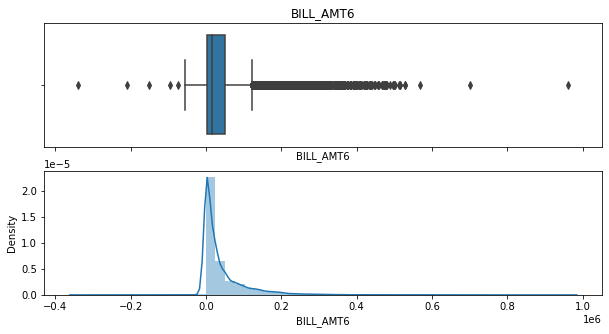

Min: 			 -339,603
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 38,872
Upper Quartile: 	 49,198
max: 			 961,664


Skew: 			 2.85
Kurtosis: 		 12.27


In [ ]:
# 8. 'BILL_AMT6'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

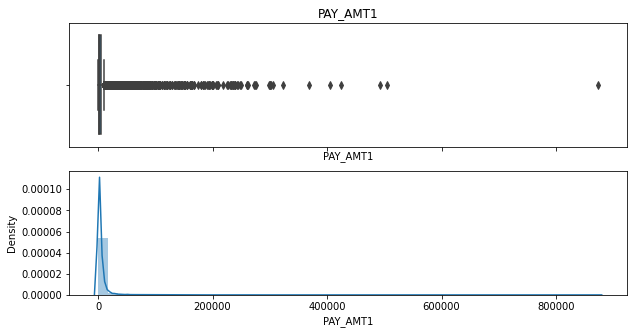

Min: 			 0
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 5,664
Upper Quartile: 	 5,006
max: 			 873,552


Skew: 			 14.67
Kurtosis: 		 415.25


In [ ]:
# 9. 'PAY_AMT1'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

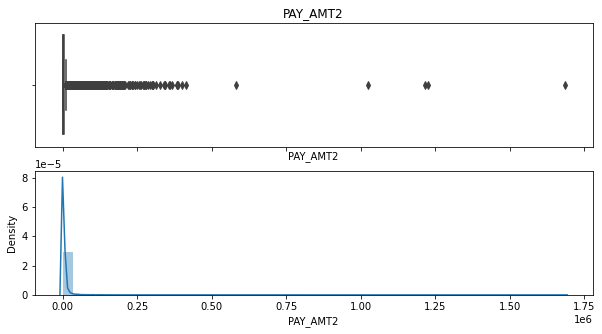

Min: 			 0
Lower Quartile: 	 833
median: 		 2,009
mean: 			 5,921
Upper Quartile: 	 5,000
max: 			 1,684,259


Skew: 			 30.45
Kurtosis: 		 1,641.63


In [ ]:
# 10. 'PAY_AMT2'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

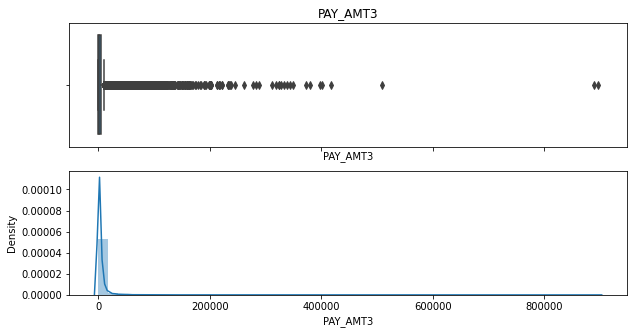

Min: 			 0
Lower Quartile: 	 390
median: 		 1,800
mean: 			 5,226
Upper Quartile: 	 4,505
max: 			 896,040


Skew: 			 17.22
Kurtosis: 		 564.31


In [ ]:
# 11. 'PAY_AMT3'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

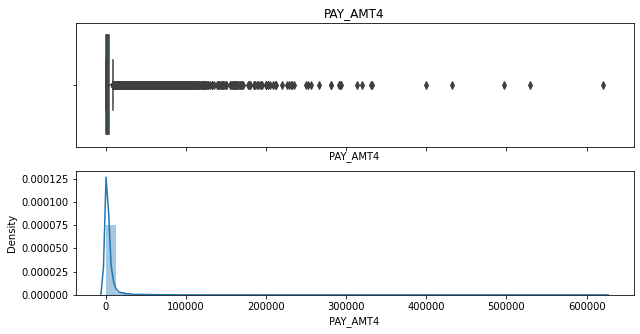

Min: 			 0
Lower Quartile: 	 296
median: 		 1,500
mean: 			 4,826
Upper Quartile: 	 4,013
max: 			 621,000


Skew: 			 12.90
Kurtosis: 		 277.33


In [ ]:
# 12. 'PAY_AMT4'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

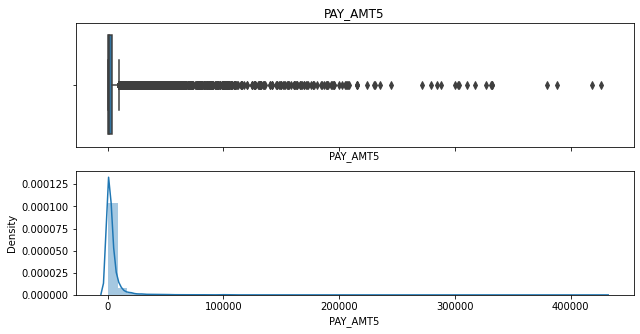

Min: 			 0
Lower Quartile: 	 252
median: 		 1,500
mean: 			 4,799
Upper Quartile: 	 4,032
max: 			 426,529


Skew: 			 11.13
Kurtosis: 		 180.06


In [ ]:
# 13. 'PAY_AMT5'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

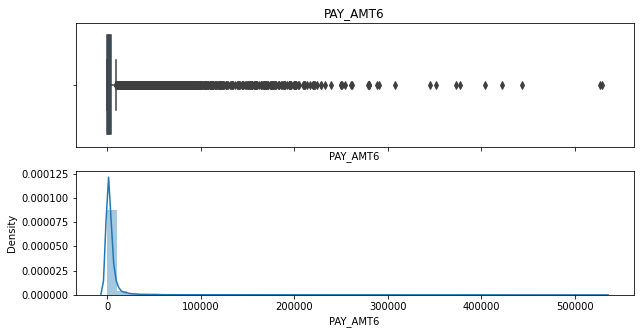

Min: 			 0
Lower Quartile: 	 118
median: 		 1,500
mean: 			 5,216
Upper Quartile: 	 4,000
max: 			 528,666


Skew: 			 10.64
Kurtosis: 		 167.16


In [ ]:
# 14. 'PAY_AMT6'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

#### Manipulations done and insights found

* We did some basic data manipulations and renamed complex column names after copying the original dataset. 
* We changed the data type of the variables and converted a few variables into categorical columns which are necessary for the model to understand. 
* We checked our dependent variable and finds out that the dependent variable may need to be rebalanced.
* We checked all categorical variables and from that 'EDUCATION' column values has been reassigned.
* We checked all numerical variables and finds out that almost every numerical column has a lot of outliers which we will remove before feature engineering.

## **4. Data Visualization: Understand the relationships between variables**

Since 'DP_NEXT_MONTH' is our dependent variable, we need to use a visualization plot to compare this column to the other columns. Before moving on to the other columns, we first examine the category data type.

Let us see how 'DP_NEXT_MONTH' = number of credit defaulters varies across different categories 

#### **Chart 1 - Pie Chart on Dependant Variable i.e., DP_NEXT_MONTH (Univariate Analysis)**

0    23364
1     6636
Name: DP_NEXT_MONTH, dtype: int64
 


Text(0.5, 1.0, 'Percentage of Default and Non-Default')

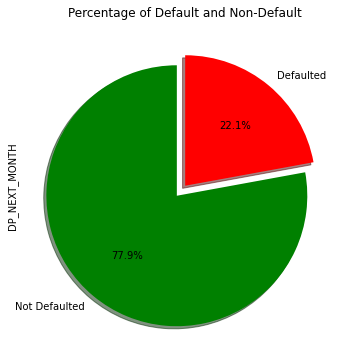

In [ ]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(df.DP_NEXT_MONTH.value_counts())
print(" ")
# Dependent Variable Column Visualization
df['DP_NEXT_MONTH'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,shadow=True,
                               labels=['Not Defaulted','Defaulted'],colors=['green','red'],explode=[0.1,0])
plt.title('Percentage of Default and Non-Default')

##### 1. Why did you pick the specific chart?

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole. 

Because DP_NEXT_MONTH is a categorical variable, a pie chart is more crucial for comprehending how the dependent variable is distributed.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 23364 customers which have not defaulted which is 77.9% of the whole clients data given in the dataset. On other hand, 6636 customers have defaulted which is 22.1% of the whold customers data given in the dataset.

22.1% customers are defaulted which might look like a small number, but from a banking institution prospective it is a huge sum of non-performing assets. So, Immediate action should be taken.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Default is when a debt, whether a loan or a security, is not paid back in full, either in terms of interest or principal. Debt can be defaulted on by individuals, businesses, and even nations. Default risk is a significant thought for lenders.

When a borrower fails to make a payment and continues to do so in the future, the financial institution's non-performing assets increase. Morever cibil score of borrower will have negative impact.

Any business can incur significant costs from an increase in NPAs. This gives the company a bad reputation in the market, which makes it harder for the company to market and an increase in NPAs can even result in the company's bankruptcy. 

#### <b> Chart 2 - DP_NEXT_MONTH Vs SEX (Univariate + Bivariate Analysis)</b>


In [ ]:
# Defining a  function for contingency table of two series
def crosstable(input_series1 = None,input_series2 = None):
  ''' This function take 2 series as input and 
  return crosstable as output with margins = True 
  '''
  output = pd.crosstab(input_series1,input_series2, margins = True)
  return output

In [ ]:
# Defining a function for contingency table of two series with percent values
def crosstable_percent(input_series1 = None,input_series2 = None):
  ''' This function take 2 series as input and 
  return crosstable with percent values
  as output with margins = True 
  '''
  table = pd.crosstab(input_series1,input_series2, margins = True)
  table_percent = (table / table.loc['All'])*100
  return table_percent

In [ ]:
# creating a dataframe for DP_NEXT_MONTH and SEX 
df_gender = crosstable(df['DP_NEXT_MONTH'],df['SEX'])

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }
# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

df_gender.rename(index = new_index, columns = new_columns, inplace = True)
df_gender

SEX,Male,Female,All
DP_NEXT_MONTH,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_gender_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['SEX'])

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%', }
# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male%', 2 : 'Female%'}

df_gender_percent.rename(index = new_index, columns = new_columns, inplace = True)
df_gender_percent

SEX,Male%,Female%,All
DP_NEXT_MONTH,,,
Non-default%,75.832773,79.223719,77.88
Default%,24.167227,20.776281,22.12
All,100.000000,100.000000,100.00


[Text(0.5, 1.0, 'Number of Male and Female in Dataset')]

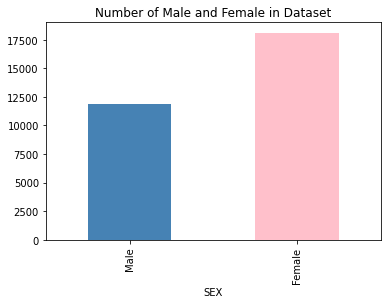

In [ ]:
# Chart - 2 visualization code
# Dependent Column Value Vs SEX
ax1 = df_gender.loc['All'][0:2].plot.bar(color = ['steelblue','pink'])
ax1.set(title ='Number of Male and Female in Dataset')

[Text(0.5, 1.0, 'Percentage of Male and Female in the dataset')]

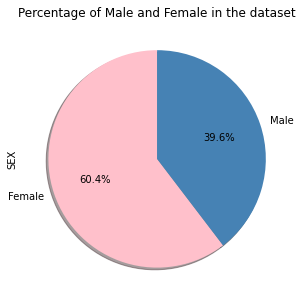

In [ ]:
# visualization code to visualize percentage of Male and Female
ax2 = df['SEX'].value_counts().plot(kind='pie',figsize=(10,5),autopct="%1.1f%%",startangle=90,shadow=True,
                      labels=['Female','Male'],colors=['pink','steelblue'])
ax2.set(title ='Percentage of Male and Female in the dataset')

[Text(0.5, 1.0, 'Number of Defaults by Gender')]

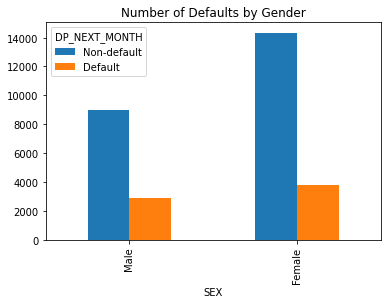

In [ ]:
# visualizing Number of defaults by Male and Female
ax3 = df_gender[0:2][['Male','Female']].T.plot.bar()
ax3.set(title = 'Number of Defaults by Gender')

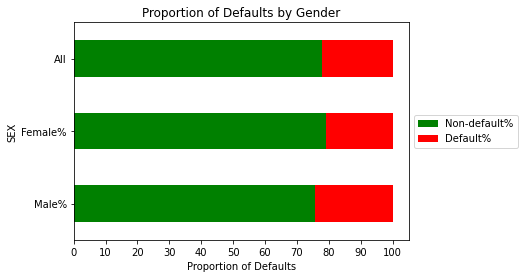

In [ ]:
# Ploting the proportion of defaults by gender
ax4 = df_gender_percent[0:2].T.plot.barh(stacked=True, xticks=list(np.linspace(0, 100, 11)),color = ['green','red'])
ax4.set(title = 'Proportion of Defaults by Gender',xlabel = 'Proportion of Defaults')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole.

Stacked charts are an extremely useful tool for comparisons. They are made to compare the total values of different categories.

I used a bar chart to show the number of DP_NEXT_MONTH by SEX.
I used pie chart to show the percentage of Male and female in the dataset.
I used a stacked bar to show proportion the data by category.


##### 2. What is/are the insight(s) found from the chart?

* The data set contains 11888 males and 18112 females.
* As number of females are higher in the data so number of defaults by females in the data is higher but if we compare the percent we will get real picture.
* For the entire data set, approximately 22.1% of the individuals defaulted.
* Approximately 24.2% of the males defaulted.
* Approximately 20.8% of the females defaulted.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The extent of defaults for male is somewhat higher than the extent of defaults for females. However, this difference appears to be insignificant and might not be statistically significant.

#### <b>Chart 3 - DP_NEXT_MONTH Vs EDUCATION (Univariate + Bivariate Analysis)
</b>

In [ ]:
# creating a dataframe for SEX and DP_NEXT_MONTH 
df_edu = crosstable(df['DP_NEXT_MONTH'],df['EDUCATION'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }
# EDUCATION :1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'}

df_edu.rename(index = new_index, columns = new_columns, inplace = True)
df_edu

EDUCATION,Graduate school,University,High school,Others,All
DP_NEXT_MONTH,,,,,
Non-default,8549,10700,3680,435,23364
Default,2036,3330,1237,33,6636
All,10585,14030,4917,468,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_edu_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['EDUCATION'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%', }
# EDUCATION :1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school%', 2 : 'University%', 3 : 'High school%', 4 : 'Others%'}

df_edu_percent.rename(index = new_index, columns = new_columns, inplace = True)
df_edu_percent

EDUCATION,Graduate school%,University%,High school%,Others%,All
DP_NEXT_MONTH,,,,,
Non-default%,80.765234,76.265146,74.842384,92.948718,77.88
Default%,19.234766,23.734854,25.157616,7.051282,22.12
All,100.000000,100.000000,100.000000,100.000000,100.00


[Text(0.5, 1.0, 'Number of Individuals with Education Level')]

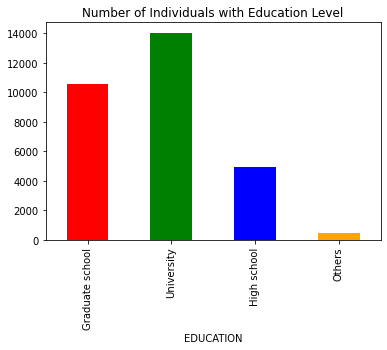

In [ ]:
# Chart - 3 visualization code
# Dependent Column Value Vs EDUCATION level
ax1 = df_edu.loc['All'][0:4].plot(kind = 'bar',color = ['red','green', 'blue','orange'])
ax1.set(title ='Number of Individuals with Education Level')

[Text(0.5, 1.0, 'Percentage of Individuals with Education Level')]

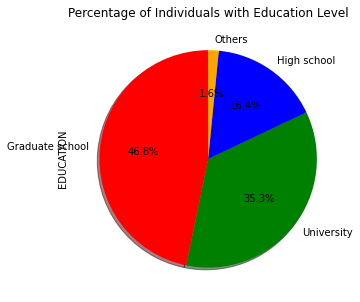

In [ ]:
# creating a pie chart to compare percentage of EDUCATION levels
ax2 = df['EDUCATION'].value_counts().plot(kind='pie',figsize=(10,5),autopct="%1.1f%%",startangle=90,shadow=True,
                      labels=['Graduate school','University','High school','Others'],colors=['red','green', 'blue','orange'])
ax2.set(title ='Percentage of Individuals with Education Level')

[Text(0.5, 1.0, 'Number of Defaults by Education level')]

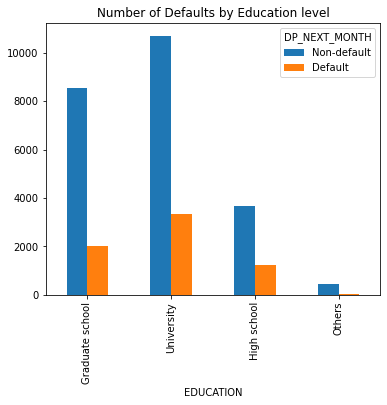

In [ ]:
# visualizing Number of defaults by EDUCATION level
ax3 = df_edu[0:2][['Graduate school','University','High school','Others']].T.plot.bar(figsize=(6, 5))
ax3.set(title = 'Number of Defaults by Education level')

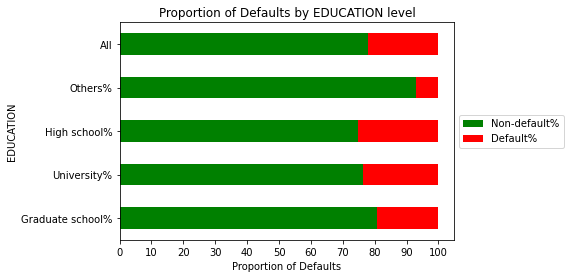

In [ ]:
# Plot the proportion of defaults by EDUCATION level
ax4 = df_edu_percent[0:2].T.plot.barh(stacked=True, xticks=list(np.linspace(0, 100, 11)),color=['green','red'])
ax4.set(title = 'Proportion of Defaults by EDUCATION level',xlabel = 'Proportion of Defaults')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
     

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole.

Stacked charts are an extremely useful tool for comparisons. They are made to compare the total values of different categories.

I used a bar chart to show the number of DP_NEXT_MONTH by EDUCATION. 
I used pie chart to show the percentage of different level of Education in the dataset. 
I used a stacked bar to show proportion the data by category.

##### 2. What is/are the insight(s) found from the chart?

The data set contains information on the level of educational attainment for each individual. There are:

* 10,585 individuals with graduate school educations;
* 14,030 individuals with university educations;
* 4,917 individuals with high school educations; and
* 468 individuals categorized as 'others'.

The proportion of defaults seems to decrease as the level of education increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One might expect that people with higher degrees tend to earn more than people with lower degrees, all else equal. Therefore, there might be reason to think that the proportion of defaults would decrease as the level of education increases.

Credit card compannies should try to give more credit limit to more educated person which will reduce the default probalilities.

#### <b>Chart 4 - DP_NEXT_MONTH Vs MARRIAGE (Univariate + Bivariate Analysis)</b>

In [ ]:
# creating a dataframe for MARRIAGE and DP_NEXT_MONTH 
df_marriage = crosstable(df['DP_NEXT_MONTH'],df['MARRIAGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }
# MARRIAGE : 1 = married; 2 = single; 3 = divorce; 0=others
new_columns = {1 : 'married', 2 : 'single', 3 : 'divorce', 0:'others'}

df_marriage.rename(index = new_index, columns = new_columns, inplace = True)
df_marriage

MARRIAGE,others,married,single,divorce,All
DP_NEXT_MONTH,,,,,
Non-default,49,10453,12623,239,23364
Default,5,3206,3341,84,6636
All,54,13659,15964,323,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_marriage_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['MARRIAGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%', }
# MARRIAGE : 1 = married; 2 = single; 3 = divorce; 0=others
new_columns = {1 : 'married%', 2 : 'single%', 3 : 'divorce%', 0:'others%'}

df_marriage_percent.rename(index = new_index, columns = new_columns, inplace = True)
df_marriage_percent

MARRIAGE,others%,married%,single%,divorce%,All
DP_NEXT_MONTH,,,,,
Non-default%,90.740741,76.528296,79.071661,73.993808,77.88
Default%,9.259259,23.471704,20.928339,26.006192,22.12
All,100.000000,100.000000,100.000000,100.000000,100.00


[Text(0.5, 1.0, 'Number of Individuals with Marital Status')]

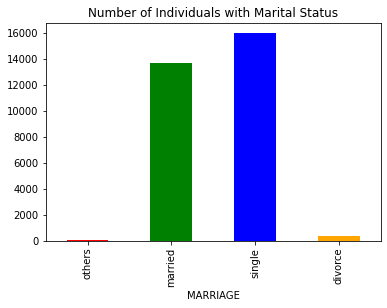

In [ ]:
# Chart - 4 visualization code
# Dependent Column Value Vs MARRIAGE
ax1 = df_marriage.loc['All'][0:4].plot(kind = 'bar',color = ['red','green', 'blue','orange'])
ax1.set(title ='Number of Individuals with Marital Status')

[Text(0.5, 1.0, 'Percentage of Individuals with Marital Status')]

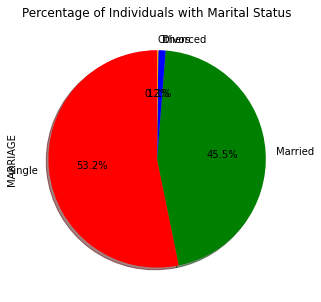

In [ ]:
# creating a pie chart to compare percentage of Marital Status
ax2 = df['MARRIAGE'].value_counts().plot(kind='pie',figsize=(10,5),autopct="%1.1f%%",startangle=90,shadow=True,
                      labels=['Single','Married','Divorced','Others'],colors=['red','green', 'blue','orange'])
ax2.set(title ='Percentage of Individuals with Marital Status')

[Text(0.5, 1.0, 'Number of Defaults by Marital Status')]

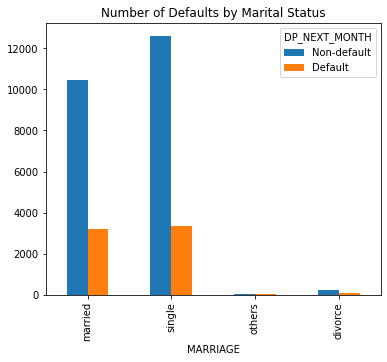

In [ ]:
# visualizing Number of defaults by MARRIAGE
ax3 = df_marriage[0:2][['married','single','others','divorce']].T.plot.bar(figsize=(6, 5))
ax3.set(title = 'Number of Defaults by Marital Status')

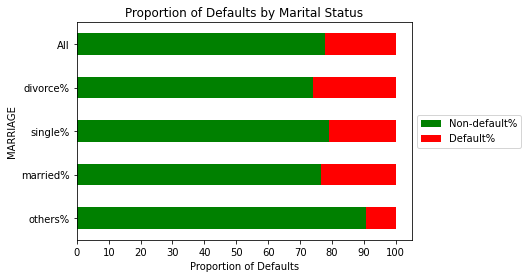

In [ ]:
# Plot the proportion of defaults by MARRIAGE
ax4 = df_marriage_percent[0:2].T.plot.barh(stacked=True, xticks=list(np.linspace(0, 100, 11)),color=['green','red'])
ax4.set(title = 'Proportion of Defaults by Marital Status',xlabel = 'Proportion of Defaults')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))     

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole.

Stacked charts are an extremely useful tool for comparisons. They are made to compare the total values of different categories.

I used a bar chart to show the number of DP_NEXT_MONTH by MARRIAGE. 
I used pie chart to show the percentage of different marital status in the dataset. 
I used a stacked bar to show proportion the data by category.

##### 2. What is/are the insight(s) found from the chart?

The data set contains information on the marital status of each individual. There are:

* 13,659 married individuals;
* 15,964 single individuals;
* 323 divorced individuals;
* 54 individuals categorized as 'others'.

The proportion of defaults seems to be highest for divorced individuals and lowest for single individuals (ignoring "Others" due to very low count).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The divorce process can inflict enormous legal expense;
Divorced individuals may have larger housing costs than married couples, since divorced individuals can no longer save on housing expenses.

So there is high risk of default in case of divorced marital status.

#### <b>Chart 5 - DP_NEXT_MONTH Vs AGE (Univariate + Bivariate Analysis)</b>

In [ ]:
# creating a dataframe for AGE and DP_NEXT_MONTH 
df_age = crosstable(df['DP_NEXT_MONTH'],df['AGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

df_age.rename(index = new_index, inplace = True)
df_age

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,53,391,684,827,884,1003,1164,1123,1292,1121,988,933,931,931,887,854,812,750,755,683,639,609,520,538,501,413,381,362,333,310,252,226,251,191,152,129,95,91,62,44,35,37,23,22,19,18,11,4,12,8,3,2,1,1,2,1,23364
Default,14,169,247,300,302,253,313,286,313,274,229,225,215,231,226,254,229,194,199,187,185,185,150,162,116,157,120,104,119,101,88,78,74,56,57,49,27,31,21,23,21,7,8,9,5,7,5,1,3,2,0,1,3,0,1,0,6636
All,67,560,931,1127,1186,1256,1477,1409,1605,1395,1217,1158,1146,1162,1113,1108,1041,944,954,870,824,794,670,700,617,570,501,466,452,411,340,304,325,247,209,178,122,122,83,67,56,44,31,31,24,25,16,5,15,10,3,3,4,1,3,1,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_age_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['AGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%'}

df_age_percent.rename(index = new_index, inplace = True)
df_age_percent

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default%,79.104478,69.821429,73.469388,73.380657,74.536256,79.856688,78.808395,79.701916,80.498442,80.358423,81.183237,80.569948,81.239092,80.120482,79.694519,77.075812,78.001921,79.449153,79.140461,78.505747,77.548544,76.700252,77.61194,76.857143,81.199352,72.45614,76.047904,77.682403,73.672566,75.425791,74.117647,74.342105,77.230769,77.327935,72.727273,72.47191,77.868852,74.590164,74.698795,65.671642,62.5,84.090909,74.193548,70.967742,79.166667,72.0,68.75,80.0,80.0,80.0,100.0,66.666667,25.0,100.0,66.666667,100.0,77.88
Default%,20.895522,30.178571,26.530612,26.619343,25.463744,20.143312,21.191605,20.298084,19.501558,19.641577,18.816763,19.430052,18.760908,19.879518,20.305481,22.924188,21.998079,20.550847,20.859539,21.494253,22.451456,23.299748,22.38806,23.142857,18.800648,27.54386,23.952096,22.317597,26.327434,24.574209,25.882353,25.657895,22.769231,22.672065,27.272727,27.52809,22.131148,25.409836,25.301205,34.328358,37.5,15.909091,25.806452,29.032258,20.833333,28.0,31.25,20.0,20.0,20.0,0.0,33.333333,75.0,0.0,33.333333,0.0,22.12
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.00,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.000000,100.0,100.00


[Text(0.5, 1.0, 'Number of Individuals by AGE')]

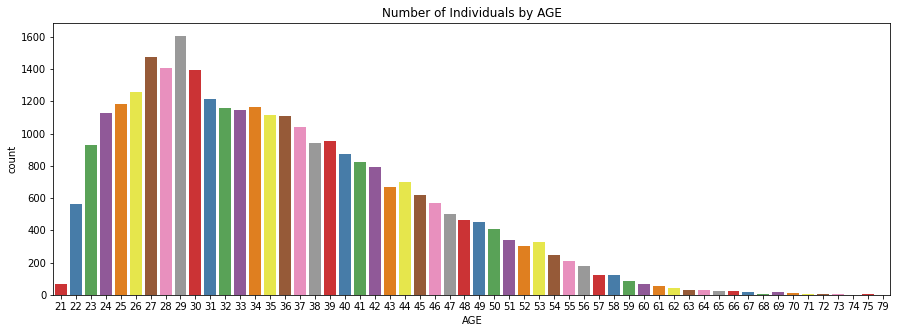

In [ ]:
# Chart - 5 visualization code
# Dependent Column Value Vs AGE
plt.figure(figsize=(15,5))
ax1 = sns.countplot(x = df['AGE'], data = df, palette= 'Set1' )
ax1.set(title = 'Number of Individuals by AGE')

[Text(0.5, 1.0, 'Number of Defaults by Age')]

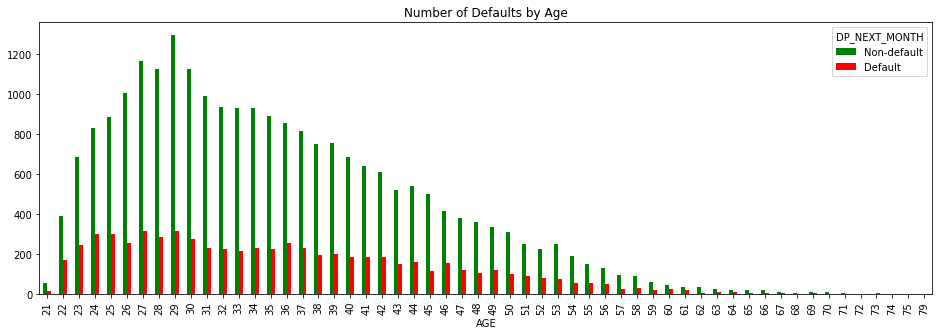

In [ ]:
# visualizing Number of defaults by AGE
ax2 = df_age.iloc[0:2,0:-1].T.plot.bar(figsize=(16, 5), color = ['g','r'])
ax2.set(title = 'Number of Defaults by Age')

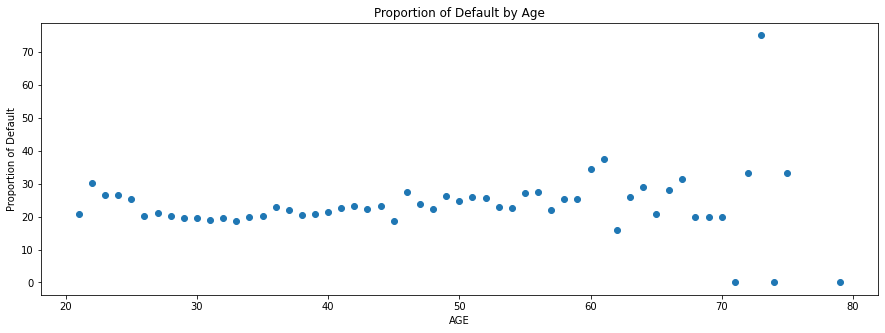

In [ ]:
# Plot the proportion of defaults by AGE
fig = plt.figure(figsize=(15, 5))

# assigning x and y value for scatter plot
y = df_age_percent.iloc[1:2,0:-1]
x = df_age_percent.T.index[0:-1]

plt.scatter(x,y)
plt.title('Proportion of Default by Age')
plt.xlabel('AGE')
plt.ylabel('Proportion of Default')
plt.show()

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

* The proportion of defaults seems to be non-linearly related with age.
* The proportion of defaults seems to decrease or constant from the early 20s to the early 60s.
* The proportion of defaults seems to increase from the early 60s onward.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For the age of 20s to 60s there is almost constant proportion of age default for credit card payment yet one insightful information is that there is higher risk for people of age group more than 60s.

#### <b>Chart 6 - DP_NEXT_MONTH Vs LIMIT_BAL (Univariate + Bivariate Analysis)</b>

In [ ]:
# creating a dataframe for LIMIT_BAL and DP_NEXT_MONTH 
df_limit_bal = crosstable(df['DP_NEXT_MONTH'],df['LIMIT_BAL'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default'}

df_limit_bal.rename(index = new_index, inplace = True)
df_limit_bal

LIMIT_BAL,10000,16000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000,310000,320000,327680,330000,340000,350000,360000,370000,380000,390000,400000,410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,710000,720000,730000,740000,750000,760000,780000,800000,1000000,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,296,2,1278,1042,138,2480,592,521,1204,485,776,456,547,572,579,923,557,454,819,180,1258,613,380,624,509,299,434,210,424,295,459,245,268,0,152,185,199,727,63,136,156,240,66,150,73,71,135,70,69,73,56,641,17,18,9,6,15,9,8,10,5,13,11,8,6,7,3,3,3,3,1,8,5,2,2,1,4,1,2,2,1,23364
Default,197,0,698,568,92,885,233,210,363,166,272,132,179,157,170,187,137,78,176,49,270,117,89,113,110,51,87,28,69,53,95,27,44,1,21,32,32,154,8,20,18,31,12,18,10,12,26,10,11,6,8,81,2,2,1,0,6,1,0,1,1,3,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,6636
All,493,2,1976,1610,230,3365,825,731,1567,651,1048,588,726,729,749,1110,694,532,995,229,1528,730,469,737,619,350,521,238,493,348,554,272,312,1,173,217,231,881,71,156,174,271,78,168,83,83,161,80,80,79,64,722,19,20,10,6,21,10,8,11,6,16,11,9,7,7,3,3,3,4,1,8,6,3,2,2,4,1,2,2,1,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_limit_bal_percent = crosstable_percent(df['DP_NEXT_MONTH'],df['LIMIT_BAL'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%'}

df_limit_bal_percent.rename(index = new_index, inplace = True)
df_limit_bal_percent

LIMIT_BAL,10000,16000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000,310000,320000,327680,330000,340000,350000,360000,370000,380000,390000,400000,410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,710000,720000,730000,740000,750000,760000,780000,800000,1000000,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default%,60.040568,100.0,64.676113,64.720497,60.0,73.699851,71.757576,71.27223,76.834716,74.500768,74.045802,77.55102,75.344353,78.463649,77.303071,83.153153,80.259366,85.338346,82.311558,78.60262,82.329843,83.972603,81.023454,84.667571,82.229402,85.428571,83.301344,88.235294,86.004057,84.770115,82.851986,90.073529,85.897436,0.0,87.861272,85.253456,86.147186,82.519864,88.732394,87.179487,89.655172,88.560886,84.615385,89.285714,87.951807,85.542169,83.850932,87.5,86.25,92.405063,87.5,88.781163,89.473684,90.0,90.0,100.0,71.428571,90.0,100.0,90.909091,83.333333,81.25,100.0,88.888889,85.714286,100.0,100.0,100.0,100.0,75.0,100.0,100.0,83.333333,66.666667,100.0,50.0,100.0,100.0,100.0,100.0,100.0,77.88
Default%,39.959432,0.0,35.323887,35.279503,40.0,26.300149,28.242424,28.72777,23.165284,25.499232,25.954198,22.44898,24.655647,21.536351,22.696929,16.846847,19.740634,14.661654,17.688442,21.39738,17.670157,16.027397,18.976546,15.332429,17.770598,14.571429,16.698656,11.764706,13.995943,15.229885,17.148014,9.926471,14.102564,100.0,12.138728,14.746544,13.852814,17.480136,11.267606,12.820513,10.344828,11.439114,15.384615,10.714286,12.048193,14.457831,16.149068,12.5,13.75,7.594937,12.5,11.218837,10.526316,10.0,10.0,0.0,28.571429,10.0,0.0,9.090909,16.666667,18.75,0.0,11.111111,14.285714,0.0,0.0,0.0,0.0,25.0,0.0,0.0,16.666667,33.333333,0.0,50.0,0.0,0.0,0.0,0.0,0.0,22.12
All,100.000000,100.0,100.000000,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.00,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00


[Text(0, 0, '10000'),
 Text(0, 0, '200000'),
 Text(0, 0, '400000'),
 Text(0, 0, '600000'),
 Text(0, 0, '1000000')]

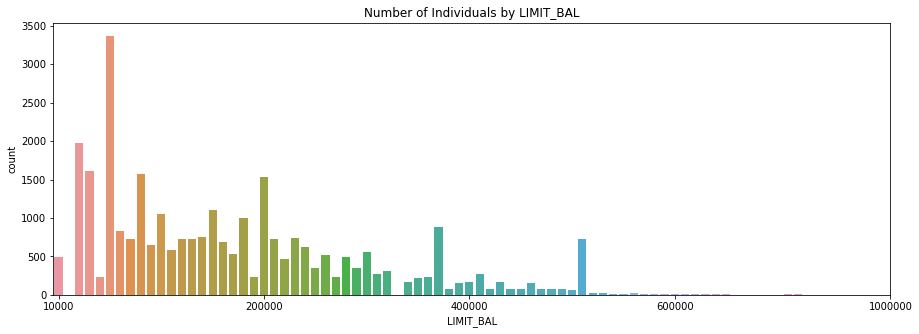

In [ ]:
# Chart - 6 visualization code
# Dependent Column Value Vs LIMIT_BAL
fig = plt.figure(figsize=(15, 5))
ax1 = sns.countplot(x = df['LIMIT_BAL'])
ax1.set(title = 'Number of Individuals by LIMIT_BAL')
ax1.set(xticks=([0,20,40,60,81]))
ax1.set_xticklabels(labels = [10000, 200000, 400000,600000,1000000])

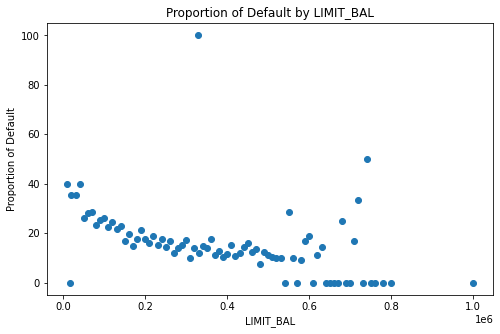

In [ ]:
# Plot the proportion of defaults by LIMIT_BAL
fig = plt.figure(figsize=(8, 5))

# assigning x and y values for scatter plot
y = df_limit_bal_percent.iloc[1:2,0:-1]
x = df_limit_bal_percent.T.index[0:-1]

plt.scatter(x,y)
plt.title('Proportion of Default by LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Proportion of Default')
plt.show()

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

* The proportion of defaults seems to be negatively correlated with credit limit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Granting the higher credit limit reduces the risk of credit card payment default

#### <b>Chart 7 - DP_NEXT_MONTH Vs Past Payment History (Multivariate Analysis)</b>

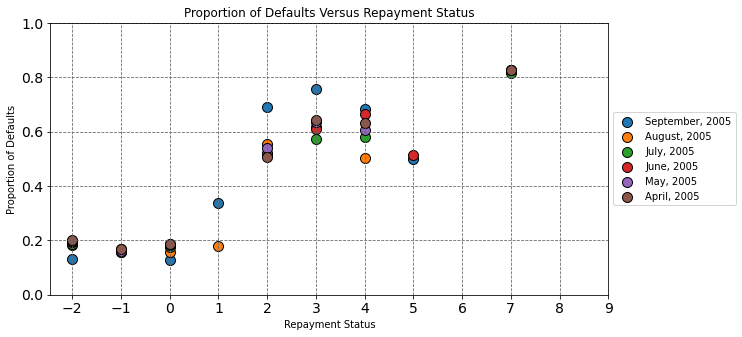

In [ ]:
# list of all past payments
pay_list =['PAY_1',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6']

# dictionary mapping
label_dict ={'PAY_1': 'September, 2005', 
             'PAY_2': 'August, 2005', 
             'PAY_3': 'July, 2005', 
             'PAY_4': 'June, 2005',  
             'PAY_5': 'May, 2005',  
             'PAY_6': 'April, 2005'}

# creating a dataframe for pay
pay_dfs = {}
for item in pay_list:
    pay_dfs[item] = df.groupby([item, 'DP_NEXT_MONTH']).size().unstack()
    pay_dfs[item] = pay_dfs[item][pay_dfs[item].sum(axis=1)>25]
    # Calculate proportions
    pay_dfs[item] = pay_dfs[item].div(pay_dfs[item].sum(axis=1), axis='index')
    pay_dfs[item].sort_index(ascending=False, inplace=True)


# plot the scatter chart
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for item in pay_list:
    ax.scatter(x=pay_dfs[item].index, 
               y=pay_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)    
    
ax.set_ylim([0, 1])
ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(ticks)

ax.xaxis.set_ticks(ticks=ticks, minor=False)
ax.grid(b=True, which='major', color='0.4', linestyle='--')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Repayment Status')  
plt.ylabel('Proportion of Defaults')
plt.xlabel('Repayment Status')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

The proportion of defaults for observations with payment delay for 2 or more months are much higher than the other observations.

#### <b>Chart 8 - DP_NEXT_MONTH Vs Past Bill Amounts (Multivariate Analysis)</b>

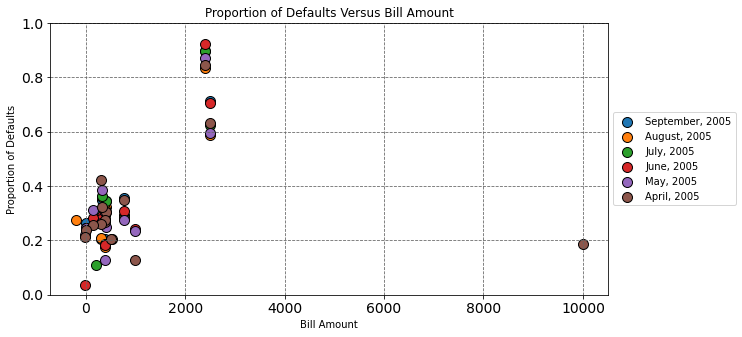

In [ ]:
# list of all past bill amounts
bill_amount_list =['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# dictionary mapping
label_dict ={'BILL_AMT1': 'September, 2005',  
             'BILL_AMT2': 'August, 2005',
             'BILL_AMT3': 'July, 2005', 
             'BILL_AMT4': 'June, 2005',  
             'BILL_AMT5': 'May, 2005', 
             'BILL_AMT6': 'April, 2005'}

# creating a dataframe for pay
bill_amount_dfs = {}
for item in bill_amount_list:
    bill_amount_dfs[item] = df.groupby([item, 'DP_NEXT_MONTH']).size().unstack()
    bill_amount_dfs[item] = bill_amount_dfs[item][bill_amount_dfs[item].sum(axis=1)>25]
    # Calculate proportions
    bill_amount_dfs[item] = bill_amount_dfs[item].div(bill_amount_dfs[item].sum(axis=1), axis='index')
    bill_amount_dfs[item].sort_index(ascending=False, inplace=True)


# plot the scatter chart
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for item in bill_amount_list:
    ax.scatter(x=bill_amount_dfs[item].index, 
               y=bill_amount_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)    
    
ax.set_ylim([0, 1])
ax.grid(b=True, which='major', color='0.4', linestyle='--')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Bill Amount')  
plt.ylabel('Proportion of Defaults')
plt.xlabel('Bill Amount')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is most frequently used to illustrate the nature of the relationship between two variables. Positive or negative, non-direct or straight, as well as significant areas of strength for the powerless, the observed connections can be found.

We use a scatter plot to comprehend the relationship between various variables for a multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can say that if the bill amount is higher than 2000 NT Dollars, customers have higher chance of default payments.

## **5. Hypothesis Testing**

#### Based on chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through codes and statistical testings.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

1. Men not defaulting are more than or equal to 40 years of AGE.
2. Customers defaulting have limit balance less than 100000.
3. Customers defaulting have total last bill amount of 50000.

In all of the hypothesis tests in this notebook, we will use a significance level of α = 0.05

#### Hypothetical Statement - 1
Men not defaulting are more than or equal to 40 years of AGE.

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 40

Alternate Hypothesis : N < 40

Test Type: Left Tailed Test


#####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# SEX: 
# 1 = male; 2 = female

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default

hypo_1 = df[(df['SEX']==1) & (df["DP_NEXT_MONTH"]==0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = hypo_1["AGE"].mean()
size = len(hypo_1)
std=(variance(hypo_1["AGE"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.2867824212425077e-290


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been failed to reject and Male customers not defaulting are more than 40 years of Age.

##### Why did you choose the specific statistical test?

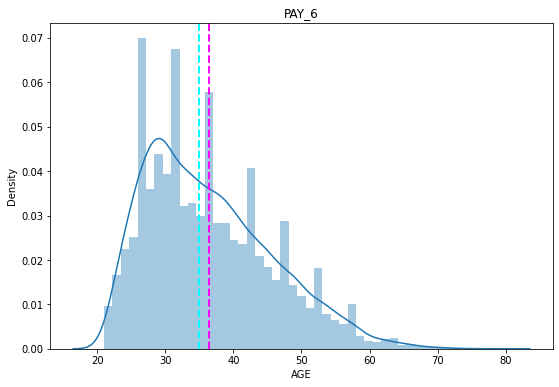

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["AGE"])
sns.distplot(hypo_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_1["AGE"].mean()- hypo_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.4286189683860258


As shown in the figure the mean is approximately same as the median, difference of mean and median is 1.42 (less than 10). Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

We have to failed to reject the null hypothesis that N < 40

#### Hypothetical Statement - 2
Customers defaulting have limit balance less than 100000

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 100000

Alternate Hypothesis : N > 100000

Test Type: Right Tailed Test


##### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_2=df[(df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = hypo_2["LIMIT_BAL"].mean()
size = len(hypo_2)
std=(variance(hypo_2["LIMIT_BAL"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 4.4753017364632867e-97


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Customers defaulting have limit balance less than 100000 is a wrong statement.

##### Why did you choose the specific statistical test?

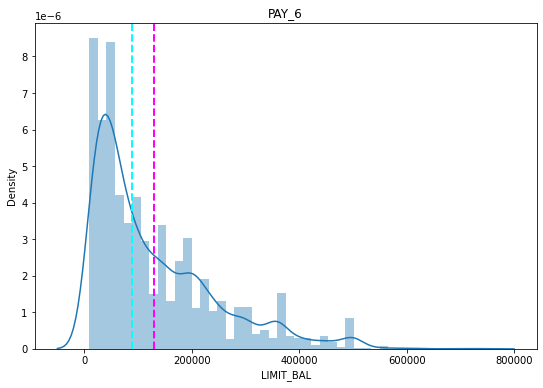

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["LIMIT_BAL"])
sns.distplot(hypo_2["LIMIT_BAL"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_2["LIMIT_BAL"].mean()- hypo_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 40109.65641952984


From the above chart we can see median is greater than mean over 10000. So, the distribution is postively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

#### Hypothetical Statement - 3
Customers defaulting have total last bill amount of 50000.

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 50000

Alternate Hypothesis : N != 50000

Test Type: Two Tailed test


##### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_3=df[(df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 50000
sample_mean = hypo_3["BILL_AMT1"].mean()
size = len(hypo_3)
std=(variance(hypo_3["BILL_AMT1"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="BILL_AMT1")

# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.09980885383426225.


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been failed to reject and Customers defaulting have total last bill amount of 50000 is a correct statement.

##### Why did you choose the specific statistical test?

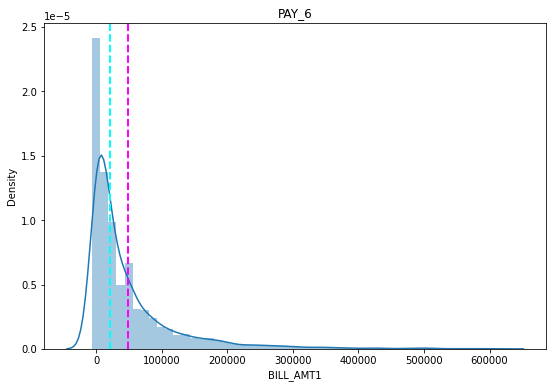

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["BILL_AMT1"])
sns.distplot(hypo_3["BILL_AMT1"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_3["BILL_AMT1"].median()- hypo_3["BILL_AMT1"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -28324.162296564195


From the above chart we can see median is greater than mean over 10000. So, the distribution is postively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## **6. Feature Engineering & Data Pre-processing**

#### <b>Copying the data and Dropping unnecessary columns

In [ ]:
# copying this data to protect the work done till now 
df_feature = df.copy()

In [ ]:
# checking the columns to drop
df_feature.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DP_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# dropping the ID column
df_feature.drop('ID',axis = 1, inplace = True)

In [ ]:
# checking the columns again
df_feature.columns                # good to go for next data pre_processing

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

#### <b> Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_feature.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
x = df_feature.isnull()

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_1            0
PAY_2            0
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1        0
BILL_AMT2        0
BILL_AMT3        0
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2         0
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
DP_NEXT_MONTH    0
dtype: int64


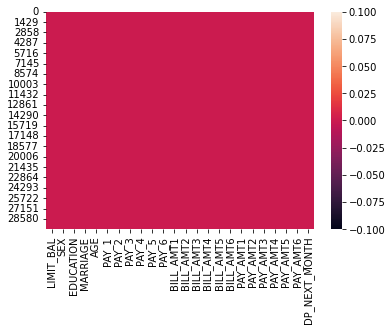

In [ ]:
sns.heatmap(df_feature.isnull(), cbar=True)

##### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

#### <b> Replace capital letters with lower-case letters and replace spaces with underscores

In [ ]:
# Get the current list of columns names
col_names_current = list(df_feature.columns)
col_names_current

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DP_NEXT_MONTH']

In [ ]:
# lower the column names usinf nested loop
col_names_new = [s.lower().replace(" ", "_") for s in col_names_current]
col_names_new

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'dp_next_month']

In [ ]:
# mapping it with dictionary
cols_dict = {old:new for (old, new) in zip(col_names_current, col_names_new)}
cols_dict

{'LIMIT_BAL': 'limit_bal',
 'SEX': 'sex',
 'EDUCATION': 'education',
 'MARRIAGE': 'marriage',
 'AGE': 'age',
 'PAY_1': 'pay_1',
 'PAY_2': 'pay_2',
 'PAY_3': 'pay_3',
 'PAY_4': 'pay_4',
 'PAY_5': 'pay_5',
 'PAY_6': 'pay_6',
 'BILL_AMT1': 'bill_amt1',
 'BILL_AMT2': 'bill_amt2',
 'BILL_AMT3': 'bill_amt3',
 'BILL_AMT4': 'bill_amt4',
 'BILL_AMT5': 'bill_amt5',
 'BILL_AMT6': 'bill_amt6',
 'PAY_AMT1': 'pay_amt1',
 'PAY_AMT2': 'pay_amt2',
 'PAY_AMT3': 'pay_amt3',
 'PAY_AMT4': 'pay_amt4',
 'PAY_AMT5': 'pay_amt5',
 'PAY_AMT6': 'pay_amt6',
 'DP_NEXT_MONTH': 'dp_next_month'}

In [ ]:
# changing the column names
df_feature.rename(columns=cols_dict, inplace=True)

In [ ]:
# Get the current list of columns names
df_feature.columns


Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'dp_next_month'],
      dtype='object')

#### <b>Changing the category column as dtype category</b>

In [ ]:
# Checking the column names to be changed into category column
# Doing this operation again as we wanted to make sure of dtype before outlier treatment.

df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   limit_bal      30000 non-null  int64   
 1   sex            30000 non-null  category
 2   education      30000 non-null  int64   
 3   marriage       30000 non-null  category
 4   age            30000 non-null  int64   
 5   pay_1          30000 non-null  category
 6   pay_2          30000 non-null  category
 7   pay_3          30000 non-null  category
 8   pay_4          30000 non-null  category
 9   pay_5          30000 non-null  category
 10  pay_6          30000 non-null  category
 11  bill_amt1      30000 non-null  int64   
 12  bill_amt2      30000 non-null  int64   
 13  bill_amt3      30000 non-null  int64   
 14  bill_amt4      30000 non-null  int64   
 15  bill_amt5      30000 non-null  int64   
 16  bill_amt6      30000 non-null  int64   
 17  pay_amt1       30000 non-null  

In [ ]:
# Make a list of categorical columns
cols=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Cast values in the categorical columns as type str.
df_feature[cols] = df_feature[cols].astype('category')

In [ ]:
# chacking the result
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   limit_bal      30000 non-null  int64   
 1   sex            30000 non-null  category
 2   education      30000 non-null  category
 3   marriage       30000 non-null  category
 4   age            30000 non-null  int64   
 5   pay_1          30000 non-null  category
 6   pay_2          30000 non-null  category
 7   pay_3          30000 non-null  category
 8   pay_4          30000 non-null  category
 9   pay_5          30000 non-null  category
 10  pay_6          30000 non-null  category
 11  bill_amt1      30000 non-null  int64   
 12  bill_amt2      30000 non-null  int64   
 13  bill_amt3      30000 non-null  int64   
 14  bill_amt4      30000 non-null  int64   
 15  bill_amt5      30000 non-null  int64   
 16  bill_amt6      30000 non-null  int64   
 17  pay_amt1       30000 non-null  

#### <b> Handling Outliers </b>

In [ ]:
# Handling Outliers & Outlier treatments
# Using for loop to create 2 lists of columns for symmetric and non_symmetric columns

symmetric_feature=[]
non_symmetric_feature=[]
for i in df_feature.describe().columns:
  if abs(df_feature[i].mean() - df_feature[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'dp_next_month']


* Most of the columns have skew symmetric distribution.
* For symmetric columns we would use Z Score > 3 pruning.(in our case there are no columns in our symmetric_feature)
* For non-symmetric columns we are using Inter Quartile Range.
* We will also drop our dependent variable 'dp_next_month' from non_symmetric_feature as it is binary feature.

##### Handling outliers in symmetric features
(Not needed in our case)

In [ ]:
# For Symmetric features defining upper and lower boundry
# def outlier_treatment(df_feature,i):
#   upper_boundary= df_feature[i].mean() + 3*df_feature[i].std()
#   lower_boundary= df_feature[i].mean() - 3*df_feature[i].std()
#   return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
# for i in symmetric_feature:
#  df_feature.loc[df_feature[i]<=outlier_treatment(df_feature=df_feature,i=i)[1], i]=outlier_treatment(df_feature=df_feature,i=i)[1]
#  df_feature.loc[df_feature[i]>=outlier_treatment(df_feature=df_feature,i=i)[0], i]=outlier_treatment(df_feature=df_feature,i=i)[0]

##### Handling outliers in non_symmetric_features

In [ ]:
# dropping 'dp_next_month' from non_symmetric_feature
non_symmetric_feature.pop(-1)

'dp_next_month'

In [ ]:
non_symmetric_feature

['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6']

In [ ]:
def plotting(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot'''

  # Display boxplot and dist plot.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()
  return None

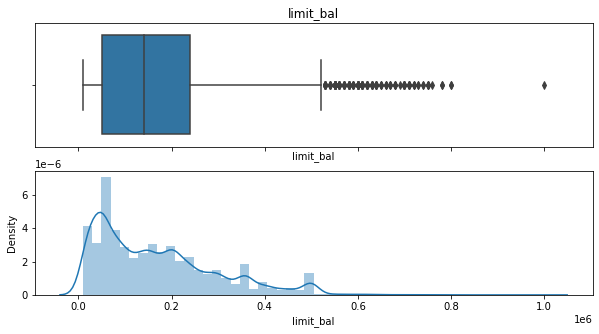

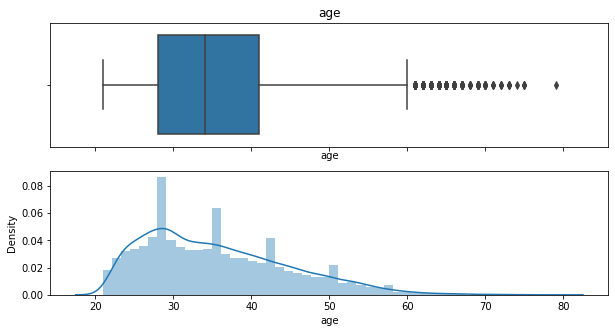

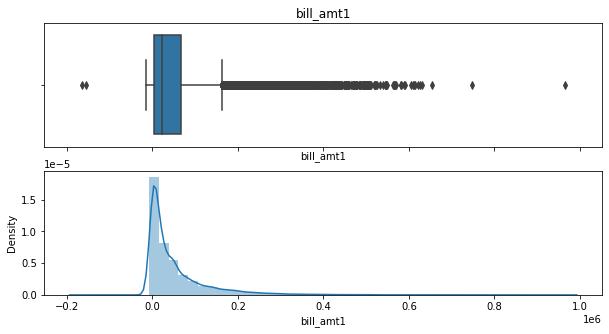

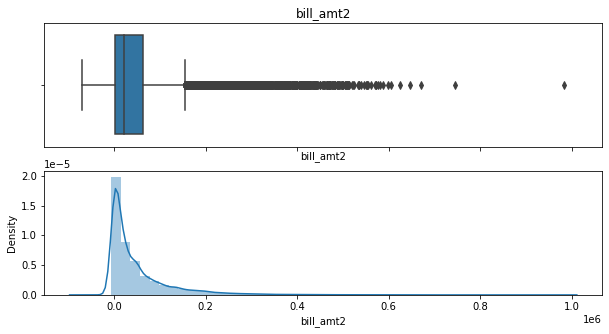

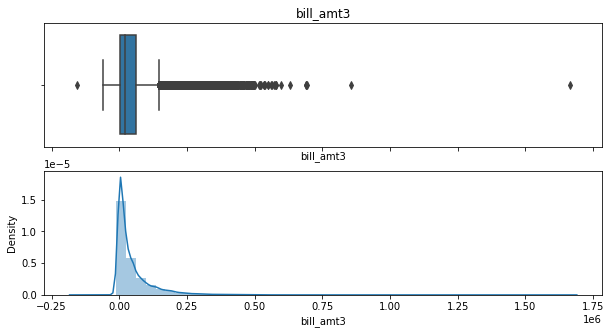

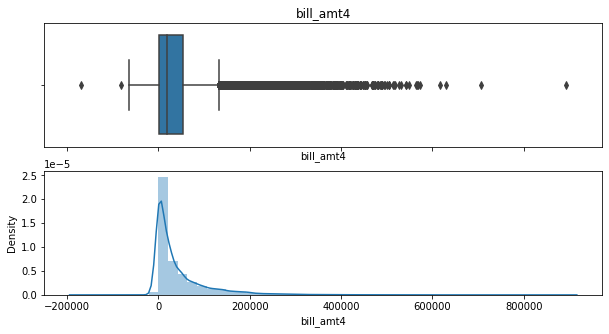

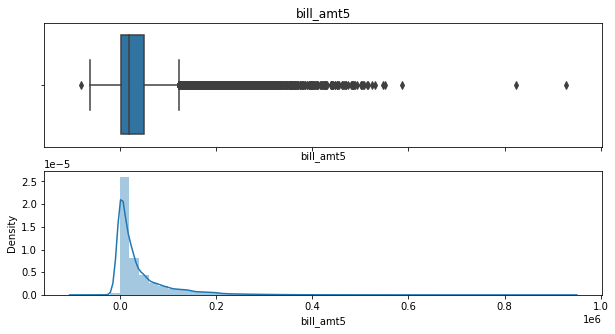

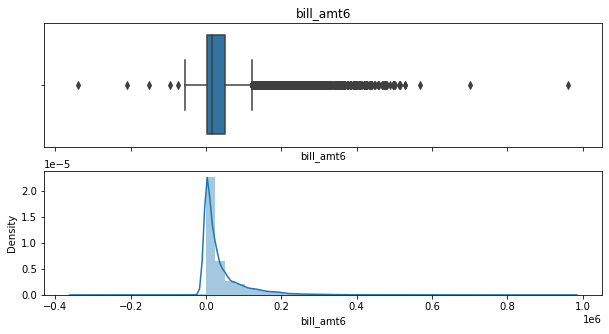

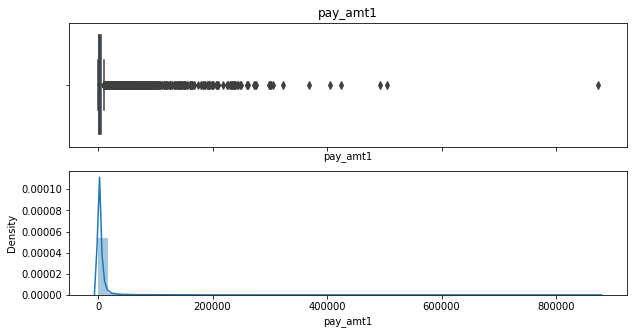

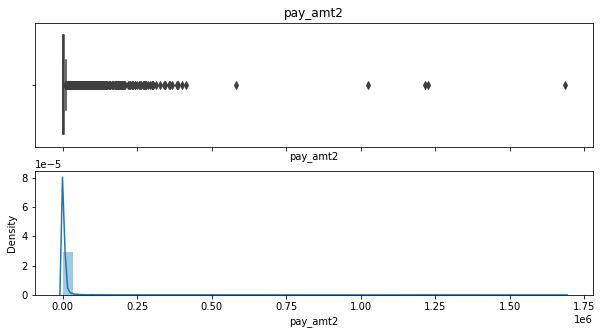

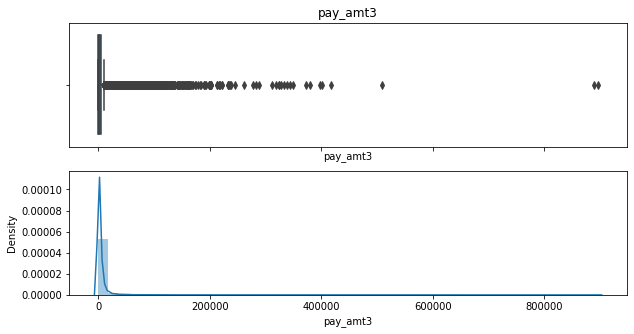

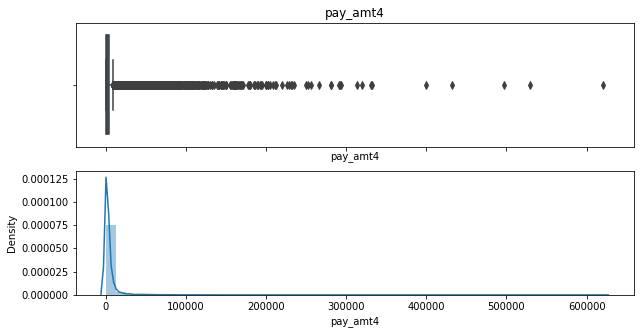

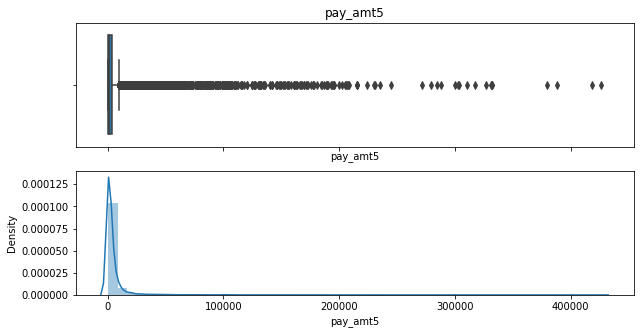

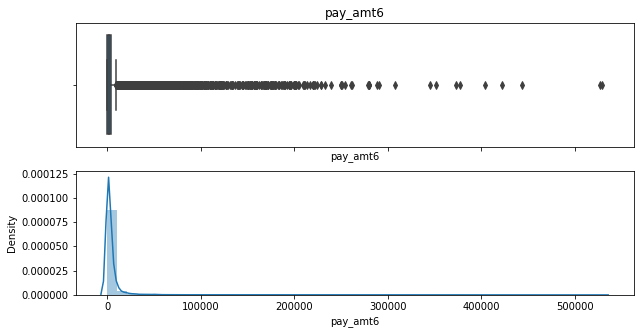

In [ ]:
# checking the plot of non_symmetric columns
for i in non_symmetric_feature:
  plotting(df_feature[i])

All of the columns in non_symmetric_features have skew symmetric distribution which we can be see from the plots.

we are going to prune the data having Z score > 3

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
# we are going to prune the data having Z score > 3

def outlier_treatment_skew(df_feature,i):
  IQR= df_feature[i].quantile(0.75)- df_feature[i].quantile(0.25)
  lower_bridge =df_feature[i].quantile(0.25)-3*IQR
  upper_bridge =df_feature[i].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Dropping rows with Zscore > 3
df_feature = df_feature[(np.abs(stats.zscore(df_feature.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [ ]:
df_feature.shape

(27076, 24)

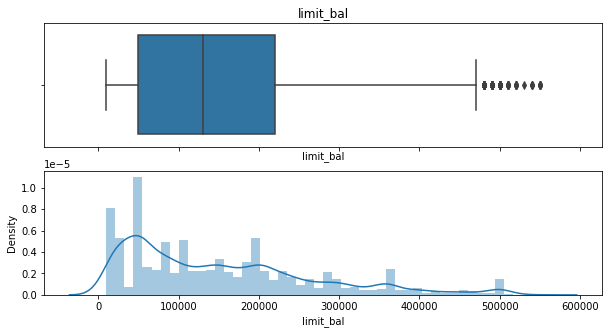

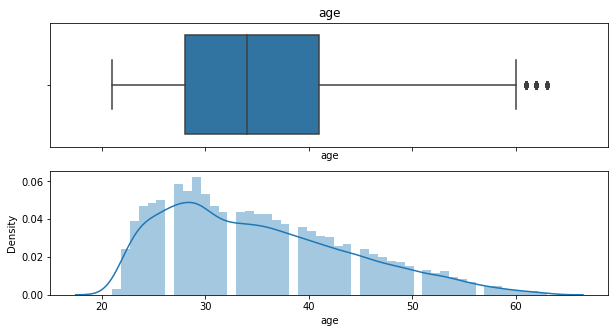

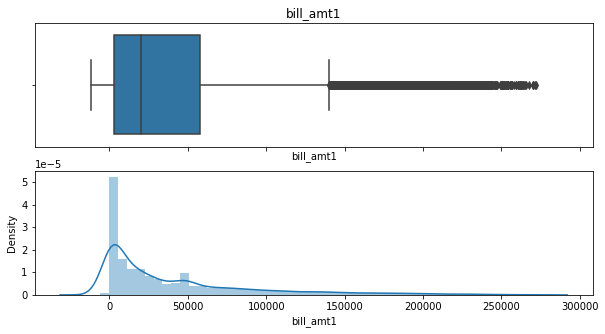

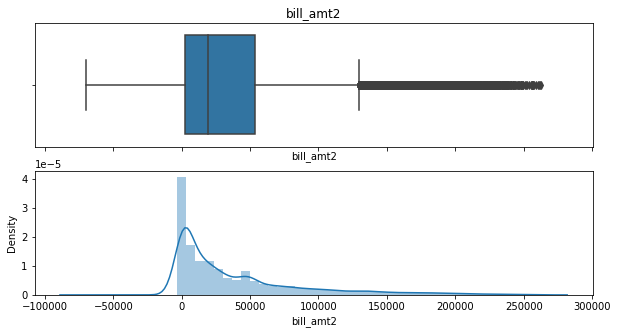

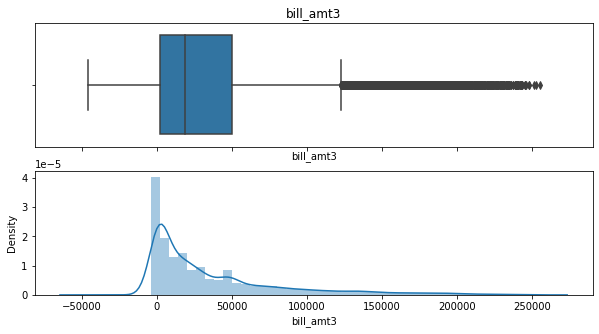

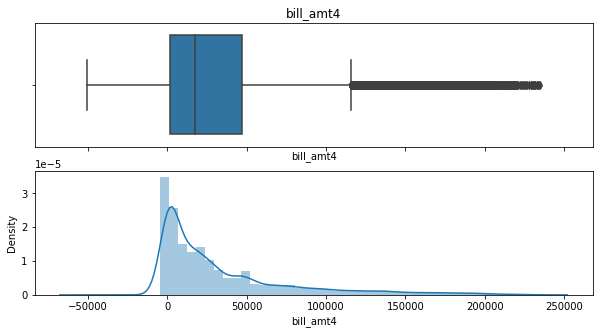

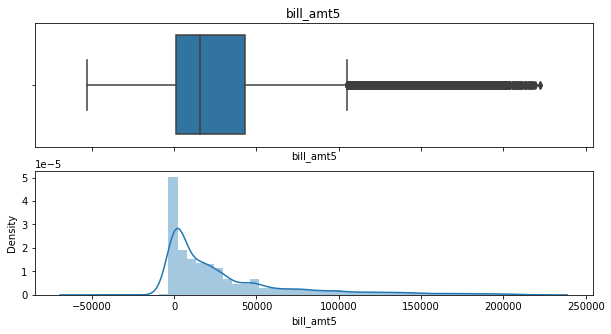

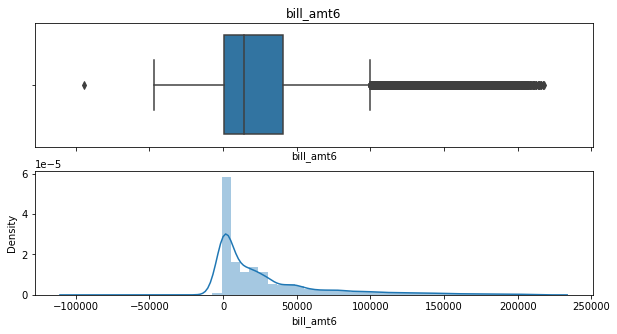

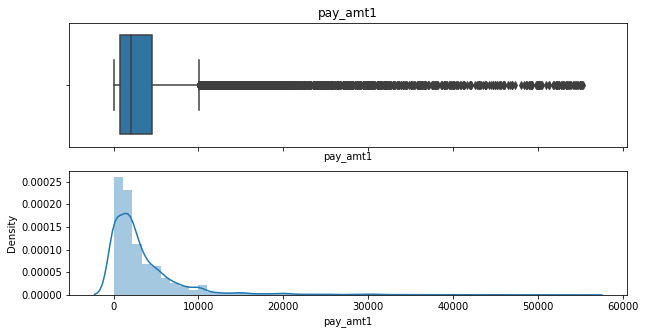

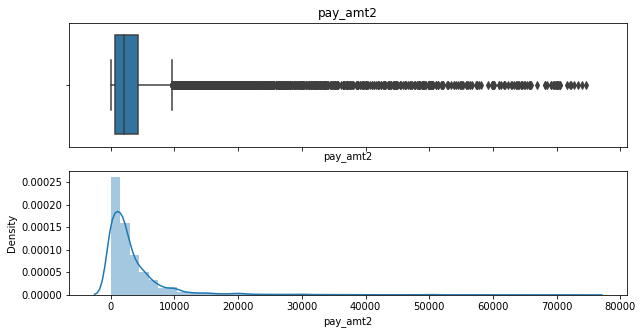

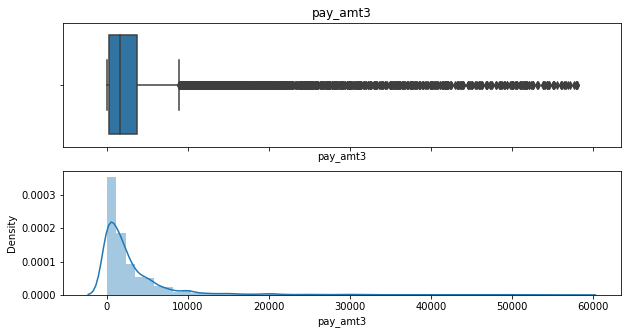

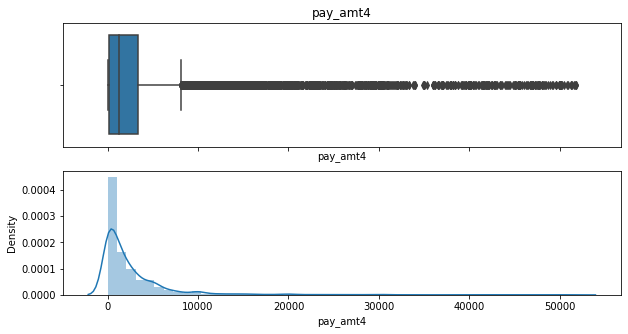

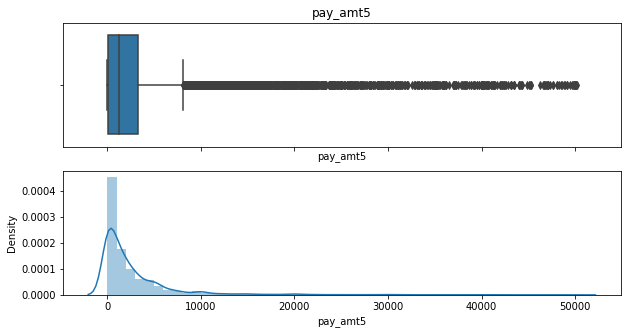

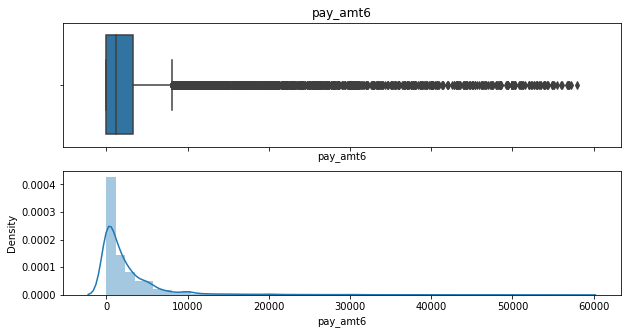

In [ ]:
# checking the distribution of treated non_symmetric_feature
for i in non_symmetric_feature:
  plotting(df_feature[i])

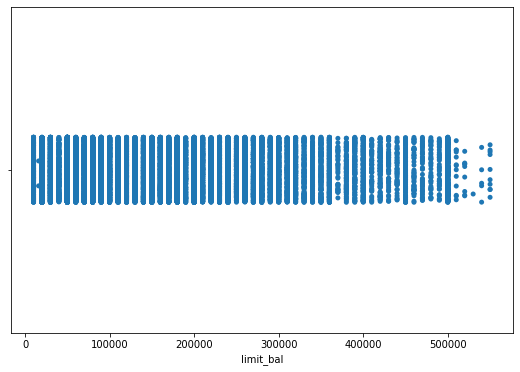

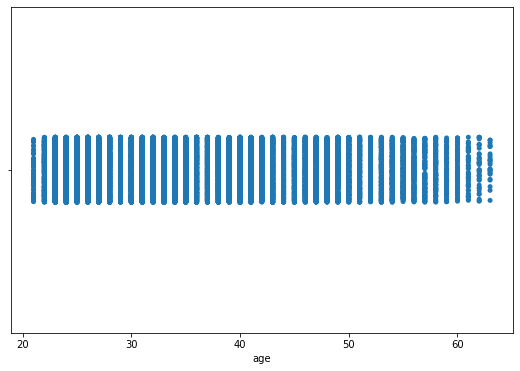

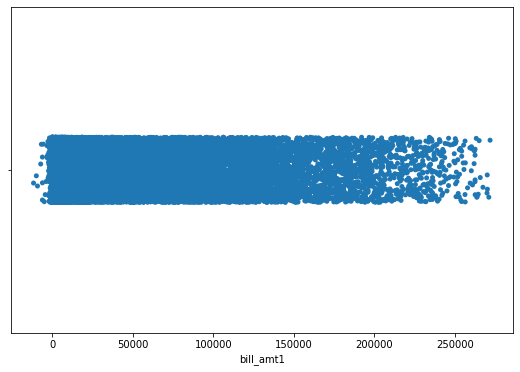

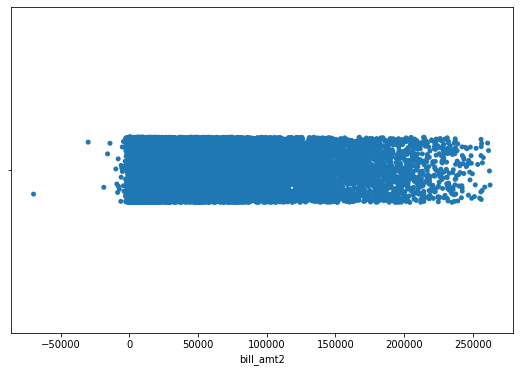

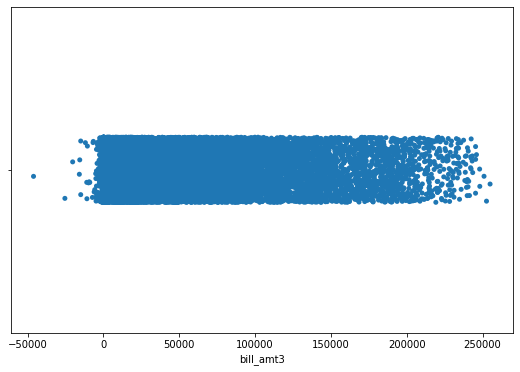

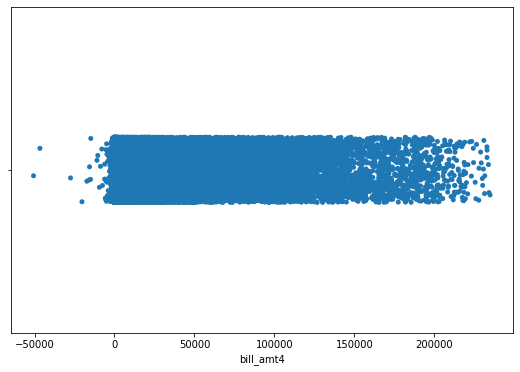

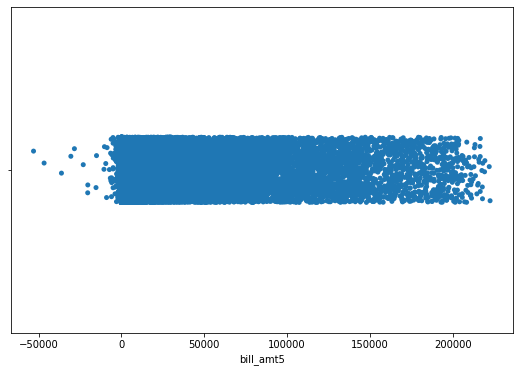

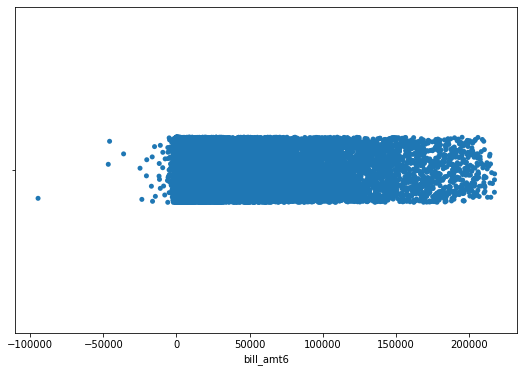

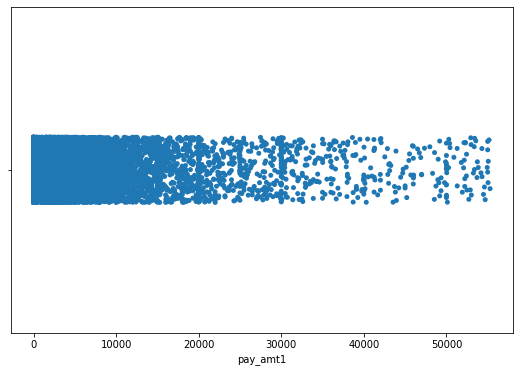

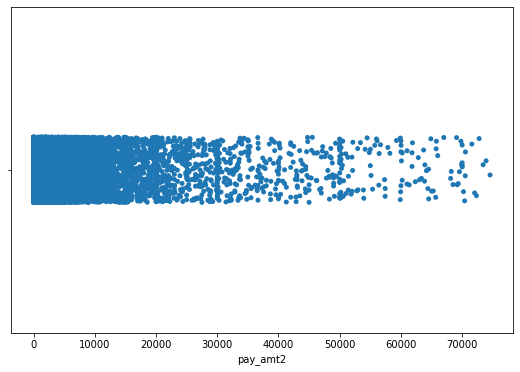

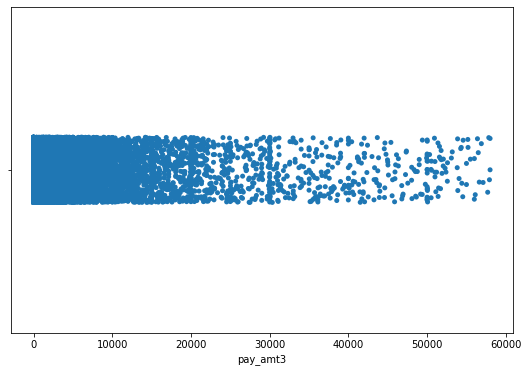

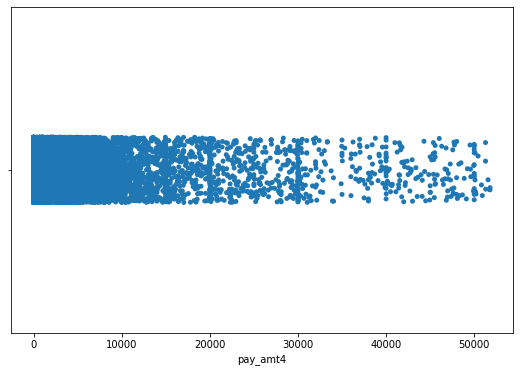

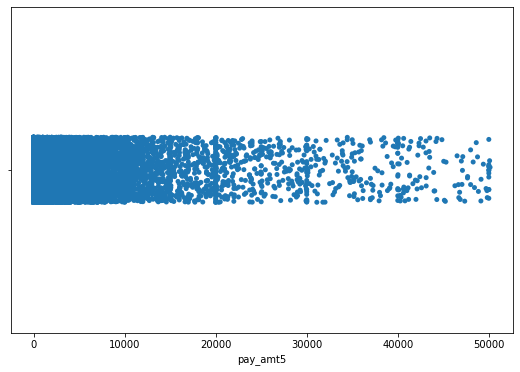

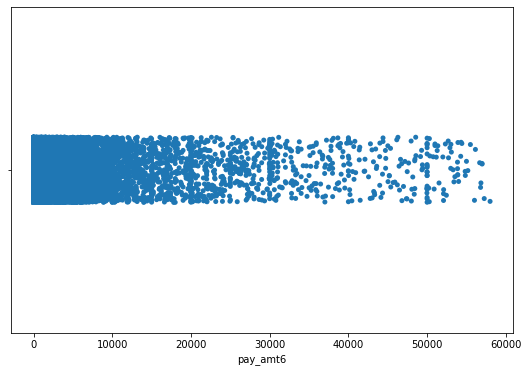

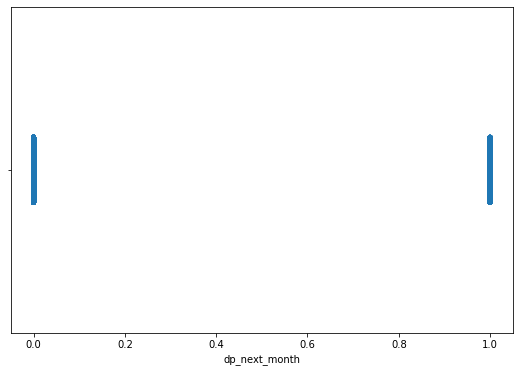

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in df_feature.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df_feature[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I changed the Area Code column to sring as it shouldn't be treated as numerical column as there are only three type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Again, as it is a classification problem I restrict the both bopundaries and I pull down the higher value restricted to the upper limit, i.e., if a person is churning with the value 150 for any column but IQR and upper boundary range is 140, so quite possible that he will also be churned for 140 too and restricting the value to 140 which is upper boundary. 

Another way to do it is dropping extreme values but I didn't do that due to less no. of datapoints I have.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


#### <b> SMOTE for Handling Imbalanced Data (Dependent Variable) </b>

0    20879
1     6197
Name: dp_next_month, dtype: int64
 


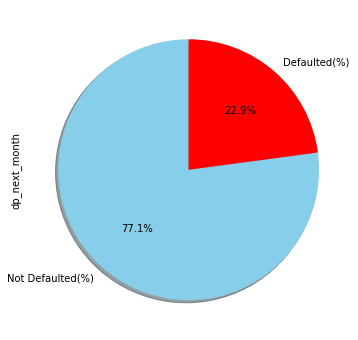

In [ ]:
# Dependant Column Value Counts
print(df_feature.dp_next_month.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_feature['dp_next_month'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulted(%)','Defaulted(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 78:22. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handling Imbalanced Dataset 
# Handaling imbalance dataset using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(df_feature.iloc[:,0:-1], df_feature['dp_next_month'])

print('Original dataset shape', len(df_feature))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 27076
Resampled dataset shape 41758


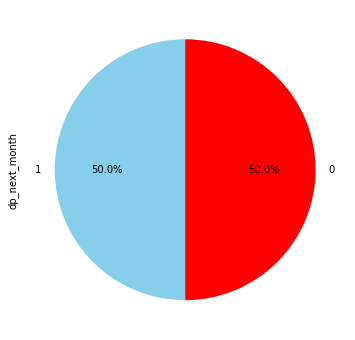

In [ ]:
# Dependant trainng Column Value Counts
y_smote.value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,colors=['skyblue','red'], )

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 78:22 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method. 

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.


In [ ]:
X_smote.shape, y_smote.shape

((41758, 23), (41758,))

We need to append all these values to our original dataframe

In [ ]:
columns = list(df_feature.columns)
columns

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'dp_next_month']

In [ ]:
columns.pop()

'dp_next_month'

In [ ]:
df_feature = pd.DataFrame(X_smote, columns=columns)

In [ ]:
df_feature['dp_next_month'] = y_smote

In [ ]:
df_feature.shape

(41758, 24)

#### <b>One-hot-encoding for categorical variables</b>

We will one-hot-encode all of the categorical variables, excluding the target variable dp_next_month.

In [ ]:
# Make a list of categorical columns
cols=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [ ]:
# check the datatypes of each column in the DataFrame
df_feature.dtypes

limit_bal           int64
sex              category
education        category
marriage         category
age                 int64
pay_1            category
pay_2            category
pay_3            category
pay_4            category
pay_5            category
pay_6            category
bill_amt1           int64
bill_amt2           int64
bill_amt3           int64
bill_amt4           int64
bill_amt5           int64
bill_amt6           int64
pay_amt1            int64
pay_amt2            int64
pay_amt3            int64
pay_amt4            int64
pay_amt5            int64
pay_amt6            int64
dp_next_month       int64
dtype: object

In [ ]:
# Cast values in the categorical columns as type str.
df_feature[cols] = df_feature[cols].astype(str)

In [ ]:
# check it again to make sure
df_feature.dtypes

limit_bal         int64
sex              object
education        object
marriage         object
age               int64
pay_1            object
pay_2            object
pay_3            object
pay_4            object
pay_5            object
pay_6            object
bill_amt1         int64
bill_amt2         int64
bill_amt3         int64
bill_amt4         int64
bill_amt5         int64
bill_amt6         int64
pay_amt1          int64
pay_amt2          int64
pay_amt3          int64
pay_amt4          int64
pay_amt5          int64
pay_amt6          int64
dp_next_month     int64
dtype: object

In [ ]:
# One-hot-encode the categorical variables
df_feature = pd.get_dummies(df_feature, columns=cols, drop_first=True)
df_feature.head(3)

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,dp_next_month,sex_2,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,pay_1_-2,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay_2_-2,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_-2,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_-2,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_-2,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_5_nan,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8,pay_6_nan
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# checking the shape of the our data after one hot encoding
df_feature.shape

(41758, 82)

##### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Label Encoding technique for Churn, Area Code, Voice Mail & International Plan column and One Hot Encoding for State Column. As we have seen during analysis, that State date is very very important and we also created some hypothesis based on our logics that there are some states which have poor network issues or maintainence needed there. So, We can ignore the State Column. Thus One hot encoded on that column, and for rest categorical columns, I have used label encoding, because there are only 2-3 unique values in each column which needed to be encoded.

#### <b> Heatmap Plot and Variable Inflation Factor </b>
Obtaining correlation between the dependent variable and other numerical features by making use of heatmap plots of all the numerical features

In [ ]:
# Correlation Heatmap visualization code
corr = df_feature.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
df_feature.shape

(41758, 82)

In [ ]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_feature.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


age
bill_amt1
bill_amt2
bill_amt3
bill_amt4
bill_amt5
bill_amt6
marriage_1
marriage_2
pay_1_0
pay_1_8
pay_2_0
pay_2_7
pay_3_0
pay_4_0
pay_4_7
pay_5_0
pay_5_6
pay_5_7
pay_6_0
pay_6_7


As of now even after calculating the VIF we are not dropping any columns which are highly correlated, We wanted to do mistake and learn from it.

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF. 

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. The features got decreased from 77 to 10.

#### <b> Dimentionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

5. Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

#### <b> Data Splitting </b>


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 70:30 ratio

X_train,X_test,y_train,y_test=train_test_split(df_feature.drop("dp_next_month",axis=1),df_feature["dp_next_month"],test_size=0.3,random_state=0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (29230, 81)
Number transactions y_train dataset:  (29230,)
Number transactions X_test dataset:  (12528, 81)
Number transactions y_test dataset:  (12528,)


##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

#### **Evaluation Metrics Used -**

* <b>Accuracy:</b> Simply put, accuracy is the percentage of times that the classifier correctly predicts. The ratio of the total number of predictions to the number of correct predictions is how accuracy is defined. If a model has a 99 percent accuracy rate, you might think it is doing very well. However, this is not always the case and can be misleading in some situations.
When the target class is well-balanced, accuracy is useful, but it is not a good choice for unbalanced classes.

* <b>Confusion Matrix:</b> The Confusion Matrix is a performance measurement for classification problems in machine learning in which there can be two or more classes output. It is a table with actual and predicted value combinations. The table that is frequently used to describe the performance of a classification model on a set of test data for which the true values are known is referred to as a confusion matrix. It is extremely helpful for determining the AUC-ROC curves, precision, recall, and accuracy.

* <b>Precision:</b> Precision explains the percentage of correctly predicted cases that were actually successful. When False Positives are more of a concern than False Negatives, precision can be useful.
A label's precision is calculated by dividing the number of predicted positives by the number of true positives.

* <b>Recall:</b> Recall describes the proportion of actual positive cases that our model correctly predicted. When False Negative is more important than False Positive, this metric is helpful. In medical cases, it matters whether we raise a false alarm or not, but the actual positive cases should not go unnoticed. The number of true positives divided by the total number of actual positives is the definition of recall for a label.

* <b>F1 Score:</b> This score incorporates both Precision and Recall metrics. When Precision and Recall are equal, it reaches its peak.
The harmonic mean of recall and precision is the F1 Score.

* <b>AUC-ROC:</b> The Receiver Operator Characteristic (ROC) is a probability curve that separates the "signal" from the "noise" by plotting the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The measure of a classifier's ability to differentiate between classes is the Area Under the Curve (AUC). This simply indicates that the classifier is able to precisely differentiate between all Positive and Negative class points when AUC is equal to 1. The classifier would correctly identify all negatives as positives when the AUC was zero.

## **7. ML Model Implementation**

#### **1st Model - Logistic Regression**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. 

The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
lr.coef_

array([[-2.29031192e-06,  1.90953135e-02, -1.58167943e-05,
         9.34953508e-06,  3.72692268e-06,  3.16469081e-06,
        -3.62292743e-06,  1.08426122e-05, -5.28932675e-05,
        -4.52989637e-05, -3.45053753e-05, -2.22840588e-05,
        -3.59721190e-05, -1.73484851e-05, -2.23471575e-04,
         3.49364053e-04, -1.20139634e-04, -3.22404242e-05,
         7.57513901e-04, -2.10252056e-04, -1.25226819e-05,
        -1.08455902e-04, -1.77999685e-04,  3.51692041e-04,
         3.97293534e-04,  4.20885698e-05,  5.19058512e-06,
         1.36173950e-06,  1.30404376e-06,  6.67684544e-07,
        -3.81909981e-07, -4.71581214e-05, -1.58606036e-04,
         2.63130948e-04,  4.01268122e-04,  2.20052608e-05,
         2.69026883e-06,  1.81588035e-06,  8.14430221e-07,
        -2.32053257e-07, -1.86034134e-07, -4.33095861e-05,
        -7.56617483e-05,  2.51799493e-04,  3.16696921e-04,
         1.59215892e-05,  5.60274537e-06,  1.35061437e-06,
         7.79340992e-07,  4.03840770e-06,  1.81315108e-0

In [ ]:
# Checking the intercept value
lr.intercept_

array([0.00053287])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = lr.predict_proba(X_train)
test_preds = lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6344851180294219
The accuracy on test data is  0.6315453384418902


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[ 7736  6898]
 [ 3786 10810]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

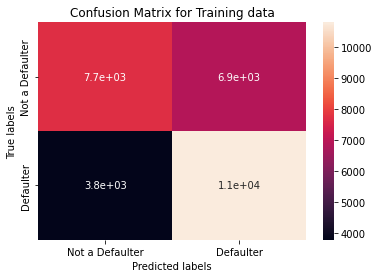

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
lr_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",lr_train_accuracy)

# Calculate Recall
lr_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",lr_train_recall)

# Calculate Precision
lr_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",lr_train_precision)

# Calculate F1_Score
lr_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",lr_train_f1_score)

# Calculate ROC_AUC
lr_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",lr_train_roc_auc_score)

Accuracy : 0.6344851180294219
Recall : 0.7406138668128255
Precision : 0.6104585498079964
F1_Score : 0.6692669638434869
ROC_AUC : 0.634622909899511


In [ ]:
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59     14634
           1       0.61      0.74      0.67     14596

    accuracy                           0.63     29230
   macro avg       0.64      0.63      0.63     29230
weighted avg       0.64      0.63      0.63     29230

 
roc_auc_score
0.634622909899511


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Logistic Regression',
       'Accuracy':round(lr_train_accuracy,2),
       'Recall':round(lr_train_recall,2),
       'Precision':round(lr_train_precision,2),
       'F1_Score':round(lr_train_f1_score,2),
       'ROC_AUC':round(lr_train_roc_auc_score,2)
       }
training_df = pd.DataFrame(dict1,index=[1])

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
1,Logistic Regression,0.63,0.74,0.61,0.67,0.63


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[3264 2981]
 [1635 4648]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

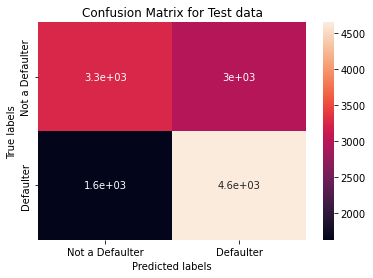

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
lr_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",lr_test_accuracy)

# Calculate Recall
lr_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",lr_test_recall)

# Calculate Precision
lr_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",lr_test_precision)

# Calculate F1_Score
lr_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",lr_test_f1_score)

# Calculate ROC_AUC
lr_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",lr_test_roc_auc_score)

Accuracy : 0.6315453384418902
Recall : 0.7397739933152953
Precision : 0.6092541617512125
F1_Score : 0.6682001150086256
ROC_AUC : 0.6312160599082481


In [ ]:
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59      6245
           1       0.61      0.74      0.67      6283

    accuracy                           0.63     12528
   macro avg       0.64      0.63      0.63     12528
weighted avg       0.64      0.63      0.63     12528

 
roc_auc_score
0.6312160599082481


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Logistic regression',
       'Accuracy':round(lr_test_accuracy,2),
       'Recall':round(lr_test_recall,2),
       'Precision':round(lr_test_precision,2),
       'F1_Score':round(lr_test_f1_score,2),
       'ROC_AUC':round(lr_test_roc_auc_score,2)
       }
test_df = pd.DataFrame(dict2,index=[1])

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
1,Logistic regression,0.63,0.74,0.61,0.67,0.63


In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
1,Logistic Regression,0.63,0.74,0.61,0.67,0.63


I used Logistic regression algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 61% and recall of 74% and f1-score of 67% for default customers. Accuracy is 63%  with a roc auc score of 63%.

For testing dataset,  i found precision of 31% and recall of 71% and f1-score of 43% for default customers. Accuracy is 57%  with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.


##### Cross- Validation & Hyperparameter Tuning

In [ ]:
#import the packages
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)

# making a grid 
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10]}
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)         (can use this too)

# fit model
grid_search = GridSearchCV(estimator=model,param_grid = param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 5, error_score=0)
grid_lr = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.741025 using {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# best score
grid_lr.best_score_

0.7410246049735554

In [ ]:
# Predicted Probability
train_preds = grid_lr.predict_proba(X_train)        
test_preds = grid_lr.predict_proba(X_test)          

In [ ]:
# Predict on the model
# Get the predicted classes
train_class_preds = grid_lr.predict(X_train)
test_class_preds = grid_lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6345193294560383
The accuracy on test data is  0.6314655172413793


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[ 7738  6896]
 [ 3787 10809]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

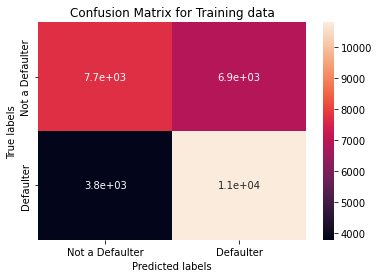

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_lr_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_lr_train_accuracy)

# Calculate Recall
grid_lr_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_lr_train_recall)

# Calculate Precision
grid_lr_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_lr_train_precision)

# Calculate F1_Score
grid_lr_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_lr_train_f1_score)

# Calculate ROC_AUC
grid_lr_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_lr_train_roc_auc_score)

Accuracy : 0.6345193294560383
Recall : 0.7405453548917512
Precision : 0.6105055069189494
F1_Score : 0.6692672053496797
ROC_AUC : 0.6346569879556473


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59     14634
           1       0.61      0.74      0.67     14596

    accuracy                           0.63     29230
   macro avg       0.64      0.63      0.63     29230
weighted avg       0.64      0.63      0.63     29230

 
roc_auc_score
0.6346569879556473


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Logistic Regression (Grid)',
       'Accuracy':round(grid_lr_train_accuracy,2),
       'Recall':round(grid_lr_train_recall,2),
       'Precision':round(grid_lr_train_precision,2),
       'F1_Score':round(grid_lr_train_f1_score,2),
       'ROC_AUC':round(grid_lr_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[3264 2981]
 [1636 4647]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

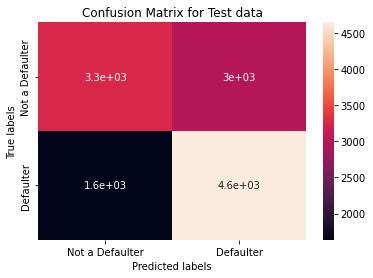

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_lr_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_lr_test_accuracy)

# Calculate Recall
grid_lr_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_lr_test_recall)

# Calculate Precision
grid_lr_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_lr_test_precision)

# Calculate F1_Score
grid_lr_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_lr_test_f1_score)

# Calculate ROC_AUC
grid_lr_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_lr_test_roc_auc_score)

Accuracy : 0.6314655172413793
Recall : 0.7396148336781793
Precision : 0.6092029365495543
F1_Score : 0.6681043778304938
ROC_AUC : 0.6311364800896901


In [ ]:
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59      6245
           1       0.61      0.74      0.67      6283

    accuracy                           0.63     12528
   macro avg       0.64      0.63      0.63     12528
weighted avg       0.64      0.63      0.63     12528

 
roc_auc_score
0.6311364800896901


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Logistic regression (Grid)',
       'Accuracy':round(grid_lr_test_accuracy,2),
       'Recall':round(grid_lr_test_recall,2),
       'Precision':round(grid_lr_test_precision,2),
       'F1_Score':round(grid_lr_test_f1_score,2),
       'ROC_AUC':round(grid_lr_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2, ignore_index=True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.63,0.74,0.61,0.67,0.63
1,Logistic regression (Grid),0.63,0.74,0.61,0.67,0.63


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 57% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvment seen in precsion, f1 score,accuracy and roc auc score for training dataset of 1%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 55% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvemnt seen in precsion, f1 score and roc auc of 1% but 1% decrement in recall.



We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

#### **2nd Model - Decision Tree** 

In [ ]:
# import the package
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# fit the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = dt.predict(X_train)
test_class_preds = dt.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9993837726805889
The accuracy on test dataset is 0.7004801181829373


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[14600     5]
 [   13 14592]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

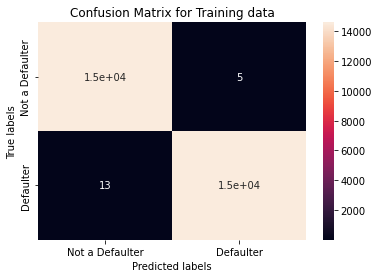

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
dt_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",dt_train_accuracy)

# Calculate Recall
dt_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",dt_train_recall)

# Calculate Precision
dt_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",dt_train_precision)

# Calculate F1_Score
dt_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",dt_train_f1_score)

# Calculate ROC_AUC
dt_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",dt_train_roc_auc_score)

Accuracy : 0.9993837726805889
Recall : 0.9991098938719617
Precision : 0.9996574638624375
F1_Score : 0.9993836038627492
ROC_AUC : 0.9993837726805889


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       1.00      1.00      1.00     14605

    accuracy                           1.00     29210
   macro avg       1.00      1.00      1.00     29210
weighted avg       1.00      1.00      1.00     29210

 
roc_auc_score
0.9993837726805889


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Decision Tree',
       'Accuracy':round(dt_train_accuracy,2),
       'Recall':round(dt_train_recall,2),
       'Precision':round(dt_train_precision,2),
       'F1_Score':round(dt_train_f1_score,2),
       'ROC_AUC':round(dt_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1, ignore_index = True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63
2,Decision Tree,1.00,1.00,1.00,1.00,1.00


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[4871 1403]
 [1030  819]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

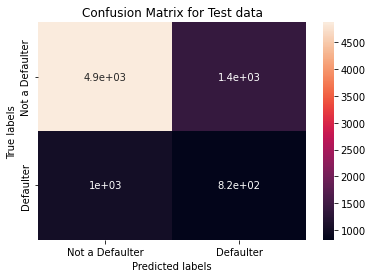

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
dt_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",dt_test_accuracy)

# Calculate Recall
dt_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",dt_test_recall)

# Calculate Precision
dt_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",dt_test_precision)

# Calculate F1_Score
dt_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",dt_test_f1_score)

# Calculate ROC_AUC
dt_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",dt_test_roc_auc_score)

Accuracy : 0.7004801181829373
Recall : 0.4429421308815576
Precision : 0.3685868586858686
F1_Score : 0.4023581429624171
ROC_AUC : 0.6096604183257007


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      6274
           1       0.37      0.44      0.40      1849

    accuracy                           0.70      8123
   macro avg       0.60      0.61      0.60      8123
weighted avg       0.72      0.70      0.71      8123

 
roc_auc_score
0.6096604183257007


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Decision Tree',
       'Accuracy':round(dt_test_accuracy,2),
       'Recall':round(dt_test_recall,2),
       'Precision':round(dt_test_precision,2),
       'F1_Score':round(dt_test_f1_score,2),
       'ROC_AUC':round(dt_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2, ignore_index = True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.57,0.71,0.31,0.43,0.62
1,Logistic regression (Grid),0.57,0.71,0.31,0.43,0.62
2,Decision Tree,0.70,0.44,0.37,0.40,0.61


I used Decision Tree algorithm to create the model. As I got good result on training data but not so good result on test data which indicated that there is a problem of overfitting in the model.

For training dataset, i found precision of 99% and recall of 99% and f1-score of 99% for default customers. Accuracy is 99%  with a roc auc score of 99%.

For testing dataset,  i found precision of 37% and recall of 44% and f1-score of 40% for default customers. Accuracy is 70%  with a roc auc score of 61%. 

Next trying to improving the score by using hyperparameter tuning technique.



In [ ]:
# making grid
param_grid = {'max_depth': [10,20], 'min_samples_split':[0.4,0.6], 'min_samples_leaf': [5,10]}

In [ ]:
# importing packages
from sklearn.tree import DecisionTreeClassifier 
grid_dt_model = DecisionTreeClassifier(criterion = "gini",random_state=42)

# Grid search
grid_dt = GridSearchCV(estimator = grid_dt_model, param_grid = param_grid, cv =5,verbose=2, scoring='recall')

In [ ]:
# Fit the Algorithm
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=0.4; total time=   0.2s
[CV]

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [0.4, 0.6]},
             scoring='recall', verbose=2)

In [ ]:
print("Best: %f using %s" % (grid_dt.best_score_, grid_dt.best_params_))

Best: 0.772681 using {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 0.4}


In [ ]:
# best decision tree model score
grid_dt.best_score_

0.7726805888394386

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = grid_dt.predict(X_train)
test_class_preds = grid_dt.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7275590551181103
The accuracy on test data is  0.655422873322664


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[ 9404  5201]
 [ 2757 11848]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

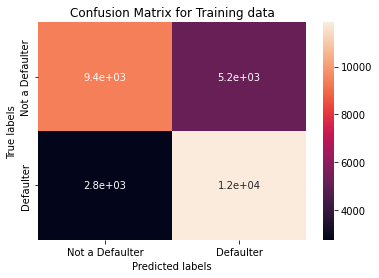

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_dt_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_dt_train_accuracy)

# Calculate Recall
grid_dt_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_dt_train_recall)

# Calculate Precision
grid_dt_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_dt_train_precision)

# Calculate F1_Score
grid_dt_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_dt_train_f1_score)

# Calculate ROC_AUC
grid_dt_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_dt_train_roc_auc_score)

Accuracy : 0.7275590551181103
Recall : 0.8112290311537145
Precision : 0.6949381195378028
F1_Score : 0.74859417451191
ROC_AUC : 0.7275590551181103


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     14605
           1       0.69      0.81      0.75     14605

    accuracy                           0.73     29210
   macro avg       0.73      0.73      0.73     29210
weighted avg       0.73      0.73      0.73     29210

 
roc_auc_score
0.7275590551181103


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Decision Tree (Grid)',
       'Accuracy':round(grid_dt_train_accuracy,2),
       'Recall':round(grid_dt_train_recall,2),
       'Precision':round(grid_dt_train_precision,2),
       'F1_Score':round(grid_dt_train_f1_score,2),
       'ROC_AUC':round(grid_dt_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63
2,Decision Tree,1.00,1.00,1.00,1.00,1.00
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[4063 2211]
 [ 588 1261]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

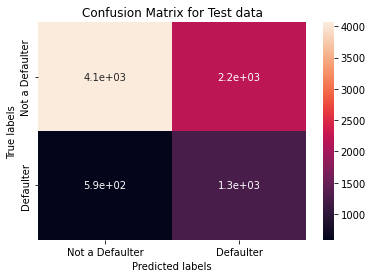

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_dt_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_dt_test_accuracy)

# Calculate Recall
grid_dt_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_dt_test_recall)

# Calculate Precision
grid_dt_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_dt_test_precision)

# Calculate F1_Score
grid_dt_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_dt_test_f1_score)

# Calculate ROC_AUC
grid_dt_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_dt_test_roc_auc_score)

Accuracy : 0.7275590551181103
Recall : 0.8112290311537145
Precision : 0.6949381195378028
F1_Score : 0.74859417451191
ROC_AUC : 0.7275590551181103


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      6274
           1       0.36      0.68      0.47      1849

    accuracy                           0.66      8123
   macro avg       0.62      0.66      0.61      8123
weighted avg       0.76      0.66      0.68      8123

 
roc_auc_score
0.6647917534795105


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Decision Tree (Grid)',
       'Accuracy':round(grid_dt_test_accuracy,2),
       'Recall':round(grid_dt_test_recall,2),
       'Precision':round(grid_dt_test_precision,2),
       'F1_Score':round(grid_dt_test_f1_score,2),
       'ROC_AUC':round(grid_dt_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.57,0.71,0.31,0.43,0.62
1,Logistic regression (Grid),0.57,0.71,0.31,0.43,0.62
2,Decision Tree,0.70,0.44,0.37,0.40,0.61
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73


I used Decision Tree gridsearchcv algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 61% and recall of 74% and f1-score of 67% for default customers. Accuracy is 63%  with a roc auc score of 63%.

For testing dataset,  i found precision of 31% and recall of 71% and f1-score of 43% for default customers. Accuracy is 57%  with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### **3rd Model - Random Forest** 

In [ ]:
# import package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the Algorithm
rf.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf.predict(X_train)
test_class_preds = rf.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9993837726805889
The accuracy on test dataset is 0.7951495752800689


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[14591    14]
 [    4 14601]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

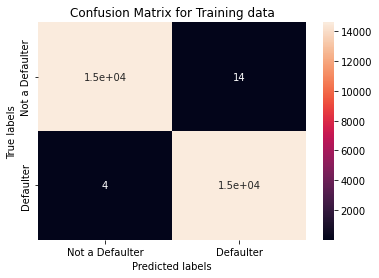

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
rf_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",rf_train_accuracy)

# Calculate Recall
rf_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",rf_train_recall)

# Calculate Precision
rf_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",rf_train_precision)

# Calculate F1_Score
rf_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",rf_train_f1_score)

# Calculate ROC_AUC
rf_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",rf_train_roc_auc_score)

Accuracy : 0.9993837726805889
Recall : 0.9997261211913728
Precision : 0.9990420800547383
F1_Score : 0.9993839835728953
ROC_AUC : 0.9993837726805889


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       1.00      1.00      1.00     14605

    accuracy                           1.00     29210
   macro avg       1.00      1.00      1.00     29210
weighted avg       1.00      1.00      1.00     29210

 
roc_auc_score
0.9993837726805889


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Random Forest',
       'Accuracy':round(rf_train_accuracy,2),
       'Recall':round(rf_train_recall,2),
       'Precision':round(rf_train_precision,2),
       'F1_Score':round(rf_train_f1_score,2),
       'ROC_AUC':round(rf_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63
2,Decision Tree,1.00,1.00,1.00,1.00,1.00
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,1.00,1.00,1.00,1.00,1.00


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5624  650]
 [1014  835]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

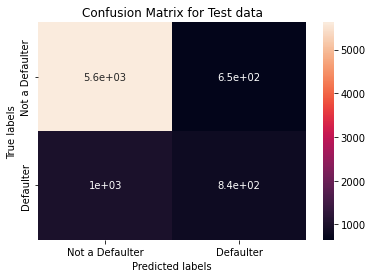

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
rf_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",rf_test_accuracy)

# Calculate Recall
rf_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",rf_test_recall)

# Calculate Precision
rf_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",rf_test_precision)

# Calculate F1_Score
rf_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",rf_test_f1_score)

# Calculate ROC_AUC
rf_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",rf_test_roc_auc_score)

Accuracy : 0.7951495752800689
Recall : 0.45159545700378584
Precision : 0.5622895622895623
F1_Score : 0.5008998200359928
ROC_AUC : 0.6739966446638312


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6274
           1       0.56      0.45      0.50      1849

    accuracy                           0.80      8123
   macro avg       0.70      0.67      0.69      8123
weighted avg       0.78      0.80      0.79      8123

 
roc_auc_score
0.6739966446638312


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Random Forest',
       'Accuracy':round(rf_test_accuracy,2),
       'Recall':round(rf_test_recall,2),
       'Precision':round(rf_test_precision,2),
       'F1_Score':round(rf_test_f1_score,2),
       'ROC_AUC':round(rf_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.57,0.71,0.31,0.43,0.62
1,Logistic regression (Grid),0.57,0.71,0.31,0.43,0.62
2,Decision Tree,0.70,0.44,0.37,0.40,0.61
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,0.80,0.45,0.56,0.50,0.67


Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 61% and recall of 74% and f1-score of 67% for default customers. Accuracy is 63%  with a roc auc score of 63%.

For testing dataset,  i found precision of 31% and recall of 71% and f1-score of 43% for default customers. Accuracy is 57%  with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.



##### Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees

# making grid
n_estimators = [150,200]

# Maximum depth of trees
max_depth = [40,50]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [50,100]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
grid_rf = GridSearchCV(estimator=rf_model,param_grid = param_dict, cv = 3, verbose=3, scoring='recall')

# Fit the Algorithm
grid_rf.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = grid_rf.predict(X_train)
test_class_preds = grid_rf.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=150;, score=0.440 total time=   4.6s
[CV 2/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=150;, score=0.871 total time=   3.9s
[CV 3/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=150;, score=0.869 total time=   4.0s
[CV 1/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=0.430 total time=   5.4s
[CV 2/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=0.873 total time=   6.8s
[CV 3/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=0.865 total time=   5.3s
[CV 1/3] END max_depth=40, min_samples_leaf=50, min_samples_split=100, n_estimators=150;, score=0.437 total time=   4.0s
[CV 2/3] END max_depth=40, min_samples_leaf=50, min_samples_split=100, n_estimators=150;, score=0.

In [ ]:
print("Best: %f using %s" % (grid_rf.best_score_, grid_rf.best_params_))

Best: 0.730152 using {'max_depth': 40, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 150}


In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8087298870249915
The accuracy on test data is  0.7715129878123845


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[12142  2463]
 [ 3124 11481]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

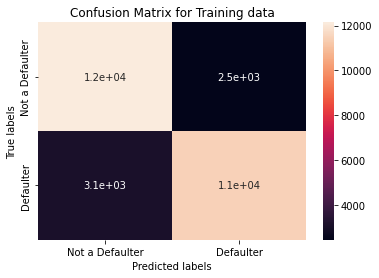

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_rf_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_rf_train_accuracy)

# Calculate Recall
grid_rf_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_rf_train_recall)

# Calculate Precision
grid_rf_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_rf_train_precision)

# Calculate F1_Score
grid_rf_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_rf_train_f1_score)

# Calculate ROC_AUC
grid_rf_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_rf_train_roc_auc_score)

Accuracy : 0.8087298870249915
Recall : 0.7861006504621705
Precision : 0.8233648881239243
F1_Score : 0.8043013765806157
ROC_AUC : 0.8087298870249915


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     14605
           1       0.82      0.79      0.80     14605

    accuracy                           0.81     29210
   macro avg       0.81      0.81      0.81     29210
weighted avg       0.81      0.81      0.81     29210

 
roc_auc_score
0.8087298870249915


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Random Forest (Grid)',
       'Accuracy':round(grid_rf_train_accuracy,2),
       'Recall':round(grid_rf_train_recall,2),
       'Precision':round(grid_rf_train_precision,2),
       'F1_Score':round(grid_rf_train_f1_score,2),
       'ROC_AUC':round(grid_rf_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63
2,Decision Tree,1.00,1.00,1.00,1.00,1.00
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,1.00,1.00,1.00,1.00,1.00
5,Random Forest (Grid),0.81,0.79,0.82,0.80,0.81


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5205 1069]
 [ 787 1062]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

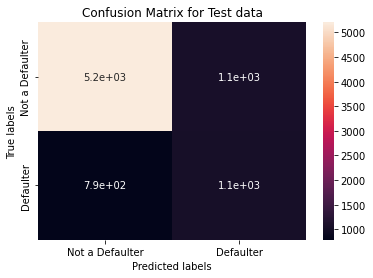

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_rf_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_rf_test_accuracy)

# Calculate Recall
grid_rf_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_rf_test_recall)

# Calculate Precision
grid_rf_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_rf_test_precision)

# Calculate F1_Score
grid_rf_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_rf_test_f1_score)

# Calculate ROC_AUC
grid_rf_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_rf_test_roc_auc_score)

Accuracy : 0.7715129878123845
Recall : 0.5743645213628988
Precision : 0.4983575786015955
F1_Score : 0.5336683417085427
ROC_AUC : 0.7019894012616216


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6274
           1       0.50      0.57      0.53      1849

    accuracy                           0.77      8123
   macro avg       0.68      0.70      0.69      8123
weighted avg       0.78      0.77      0.78      8123

 
roc_auc_score
0.7019894012616216


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Random Forest (Grid)',
       'Accuracy':round(grid_rf_test_accuracy,2),
       'Recall':round(grid_rf_test_recall,2),
       'Precision':round(grid_rf_test_precision,2),
       'F1_Score':round(grid_rf_test_f1_score,2),
       'ROC_AUC':round(grid_rf_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.57,0.71,0.31,0.43,0.62
1,Logistic regression (Grid),0.57,0.71,0.31,0.43,0.62
2,Decision Tree,0.70,0.44,0.37,0.40,0.61
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,0.80,0.45,0.56,0.50,0.67
5,Random Forest (Grid),0.77,0.57,0.50,0.53,0.70


I used Random Forest (Grid) algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 61% and recall of 74% and f1-score of 67% for default customers. Accuracy is 63%  with a roc auc score of 63%.

For testing dataset,  i found precision of 31% and recall of 71% and f1-score of 43% for default customers. Accuracy is 57%  with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### **4th Model - XGBoost Classifier** 

In [ ]:
#import lightgbm and xgboost 
import xgboost as xgb

In [ ]:
# ML Model - 4 Implementation
# Create an instance of the XGBoostClassifier
xg_model = xgb.XGBClassifier()

# Fit the Algorithm
xgb = xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xgb.predict(X_train)
test_class_preds = xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8316330023964396
The accuracy on test data is  0.7840699249045919


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[12849  1756]
 [ 3162 11443]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

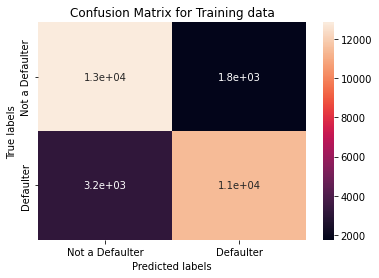

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
xgb_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",xgb_train_accuracy)

# Calculate Recall
xgb_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",xgb_train_recall)

# Calculate Precision
xgb_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",xgb_train_precision)

# Calculate F1_Score
xgb_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",xgb_train_f1_score)

# Calculate ROC_AUC
xgb_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",xgb_train_roc_auc_score)

Accuracy : 0.8316330023964396
Recall : 0.7834988017802123
Precision : 0.8669596181528904
F1_Score : 0.8231189756869516
ROC_AUC : 0.8316330023964396


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     14605
           1       0.87      0.78      0.82     14605

    accuracy                           0.83     29210
   macro avg       0.83      0.83      0.83     29210
weighted avg       0.83      0.83      0.83     29210

 
roc_auc_score
0.8316330023964396


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'XGBoost',
       'Accuracy':round(xgb_train_accuracy,2),
       'Recall':round(xgb_train_recall,2),
       'Precision':round(xgb_train_precision,2),
       'F1_Score':round(xgb_train_f1_score,2),
       'ROC_AUC':round(xgb_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63
2,Decision Tree,1.00,1.00,1.00,1.00,1.00
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,1.00,1.00,1.00,1.00,1.00
5,Random Forest (Grid),0.81,0.79,0.82,0.80,0.81
6,XGBoost,0.83,0.78,0.87,0.82,0.83


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5472  802]
 [ 952  897]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

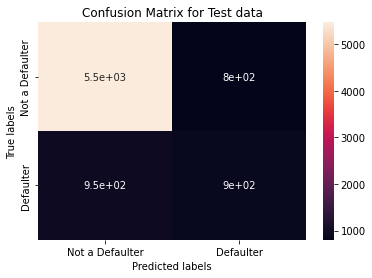

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
xgb_test_accuracy = accuracy_score(y_test, test_class_preds)
print("Accuracy :",xgb_test_accuracy)

# Calculate Recall
xgb_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",xgb_test_recall)

# Calculate Precision
xgb_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",xgb_test_precision)

# Calculate F1_Score
xgb_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",xgb_test_f1_score)

# Calculate ROC_AUC
xgb_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",xgb_test_roc_auc_score)

Accuracy : 0.7840699249045919
Recall : 0.48512709572742024
Precision : 0.5279576221306651
F1_Score : 0.5056369785794814
ROC_AUC : 0.6786489798050555


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6274
           1       0.53      0.49      0.51      1849

    accuracy                           0.78      8123
   macro avg       0.69      0.68      0.68      8123
weighted avg       0.78      0.78      0.78      8123

 
roc_auc_score
0.6786489798050555


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'XGBoost',
       'Accuracy':round(xgb_test_accuracy,2),
       'Recall':round(xgb_test_recall,2),
       'Precision':round(xgb_test_precision,2),
       'F1_Score':round(xgb_test_f1_score,2),
       'ROC_AUC':round(xgb_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.57,0.71,0.31,0.43,0.62
1,Logistic regression (Grid),0.57,0.71,0.31,0.43,0.62
2,Decision Tree,0.70,0.44,0.37,0.40,0.61
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,0.80,0.45,0.56,0.50,0.67
5,Random Forest (Grid),0.77,0.57,0.50,0.53,0.70
6,XGBoost,0.78,0.49,0.53,0.51,0.68


I used Logistic regression algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 61% and recall of 74% and f1-score of 67% for default customers. Accuracy is 63%  with a roc auc score of 63%.

For testing dataset,  i found precision of 31% and recall of 71% and f1-score of 43% for default customers. Accuracy is 57%  with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.



##### Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Number of trees
n_estimators = [40,50]

# Maximum depth of trees
max_depth = [4,6]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
grid_xgb = GridSearchCV(estimator=xg_model, param_grid = param_dict, cv = 3, verbose=2, scoring='recall')

grid_xgb = grid_xgb.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = grid_xgb.predict(X_train)
test_class_preds = grid_xgb.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   3.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=40; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=40; total time=   2.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=40; total time=   2.6s
[CV] END max_depth=4, min_s

In [ ]:
print("Best: %f using %s" % (grid_xgb.best_score_, grid_xgb.best_params_))

Best: 0.733435 using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 40}


In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8266004792879151
The accuracy on test data is  0.7800073864335837


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[12741  1864]
 [ 3201 11404]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

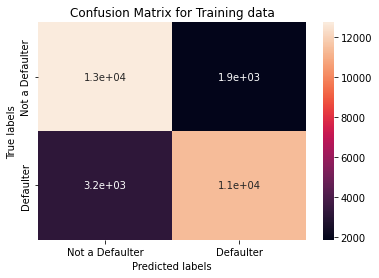

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_xgb_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_xgb_train_accuracy)

# Calculate Recall
grid_xgb_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_xgb_train_recall)

# Calculate Precision
grid_xgb_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_xgb_train_precision)

# Calculate F1_Score
grid_xgb_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_xgb_train_f1_score)

# Calculate ROC_AUC
grid_xgb_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_xgb_train_roc_auc_score)

Accuracy : 0.8266004792879151
Recall : 0.7808284833960972
Precision : 0.859511606873681
F1_Score : 0.818282926129229
ROC_AUC : 0.8266004792879151


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     14605
           1       0.86      0.78      0.82     14605

    accuracy                           0.83     29210
   macro avg       0.83      0.83      0.83     29210
weighted avg       0.83      0.83      0.83     29210

 
roc_auc_score
0.8266004792879151


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'XGBoost (Grid)',
       'Accuracy':round(grid_xgb_train_accuracy,2),
       'Recall':round(grid_xgb_train_recall,2),
       'Precision':round(grid_xgb_train_precision,2),
       'F1_Score':round(grid_xgb_train_f1_score,2),
       'ROC_AUC':round(grid_xgb_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic Regression,0.63,0.74,0.61,0.67,0.63
1,Logistic Regression (Grid),0.63,0.74,0.61,0.67,0.63
2,Decision Tree,1.00,1.00,1.00,1.00,1.00
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,1.00,1.00,1.00,1.00,1.00
5,Random Forest (Grid),0.81,0.79,0.82,0.80,0.81
6,XGBoost,0.83,0.78,0.87,0.82,0.83
7,XGBoost (Grid),0.83,0.78,0.86,0.82,0.83


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5441  833]
 [ 954  895]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

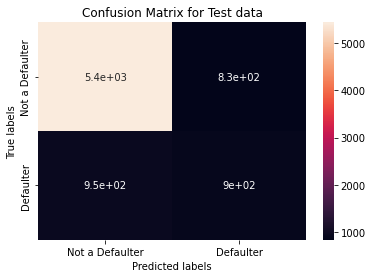

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_xgb_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_xgb_test_accuracy)

# Calculate Recall
grid_xgb_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_xgb_test_recall)

# Calculate Precision
grid_xgb_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_xgb_test_precision)

# Calculate F1_Score
grid_xgb_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_xgb_test_f1_score)

# Calculate ROC_AUC
grid_xgb_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_xgb_test_roc_auc_score)

Accuracy : 0.7800073864335837
Recall : 0.48404542996214167
Precision : 0.5179398148148148
F1_Score : 0.5004193458205201
ROC_AUC : 0.6756376336932162


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6274
           1       0.52      0.48      0.50      1849

    accuracy                           0.78      8123
   macro avg       0.68      0.68      0.68      8123
weighted avg       0.78      0.78      0.78      8123

 
roc_auc_score
0.6756376336932162


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'XGBoost (Grid)',
       'Accuracy':round(grid_xgb_test_accuracy,2),
       'Recall':round(grid_xgb_test_recall,2),
       'Precision':round(grid_test_clf_precision,2),
       'F1_Score':round(grid_test_clf_f1_score,2),
       'ROC_AUC':round(grid_test_clf_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

,Model,Accuracy,Recall,Precision,F1_Score,ROC_AUC
0,Logistic regression,0.57,0.71,0.31,0.43,0.62
1,Logistic regression (Grid),0.57,0.71,0.31,0.43,0.62
2,Decision Tree,0.70,0.44,0.37,0.40,0.61
3,Decision Tree (Grid),0.73,0.81,0.69,0.75,0.73
4,Random Forest,0.80,0.45,0.56,0.50,0.67
5,Random Forest (Grid),0.77,0.57,0.50,0.53,0.70
6,XGBoost,0.78,0.49,0.53,0.51,0.68
7,XGBoost (Grid),0.78,0.48,0.52,0.50,0.68


I used XGBoost (Grid) algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 61% and recall of 74% and f1-score of 67% for default customers. Accuracy is 63%  with a roc auc score of 63%.

For testing dataset,  i found precision of 31% and recall of 71% and f1-score of 43% for default customers. Accuracy is 57%  with a roc auc score of 63%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### <b>5th Model - Deep Neural Network</b>

In [ ]:
# Import Package
from tensorflow import keras

In [ ]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),     # ReLU stands for Rectified Linear Unit.
        keras.layers.Dense(64, activation='relu'),      # it does not activate all the neurons at the same time.
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='sigmoid')      # softmax - used for  multinomial probability, sigmoid - binomial
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Fot the deep neural network
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

model = get_model()
dnn_clf = model.fit(train_ds, validation_data=val_ds, epochs=20)

NameError: ignored

In [ ]:
# Predict on the model
# Making predictions on train and test data

train_class_preds = dnn_clf.predict(X_train)
test_class_preds = dnn_clf.predict(X_test)

AttributeError: ignored

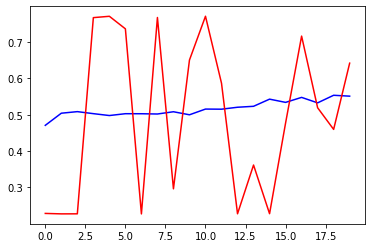

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dnn_clf.history['accuracy'], color='blue')
plt.plot(dnn_clf.history['val_accuracy'], color='red')
plt.show()

#### **2nd Model - Support Vector Classifier** 

In [ ]:
# import package
from sklearn import svm

In [ ]:
svc_clf = svm.SVC(kernel='linear', C = 1.0)
svc_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1],   
              'kernel': ['rbf']} 

In [ ]:
# import the packages
grid_clf = GridSearchCV(SVC(probability=True), scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

TypeError: ignored

In [ ]:
# import the packages
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
# best estimator
optimal_SVC_clf = grid_clf.best_estimator_
optimal_SVC_clf

SVC(C=1, probability=True)

In [ ]:
# best CV
grid_clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
# best score
grid_clf.best_score_

0.822089552238806

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.819502487562189
The accuracy on test data is  0.8123232323232323


In [ ]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.8180808080808081
The precision on test data is  0.3634703196347032
The recall on test data is  0.6616791354945969
The f1 on test data is  0.4692012967875037
The roc_score on test data is  0.7506969898468729


We can see from above results that we are getting around 80% train accuracy and 78% for test accuracy which is not bad. But f1- score is 76% approx, so there might be more ground for improvement.

[[14954   700]
 [ 2718  1728]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

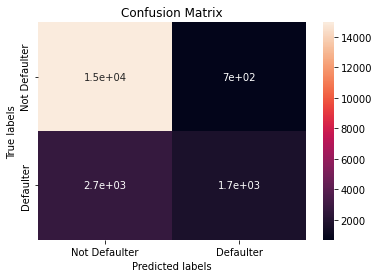

In [ ]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Optimum SVC
optimal_SVC_clf

SVC(C=1, probability=True)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

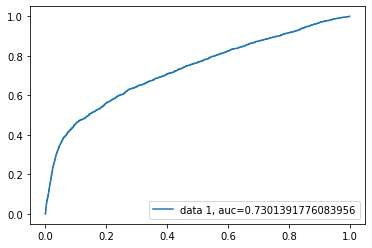

In [ ]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented SVC and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

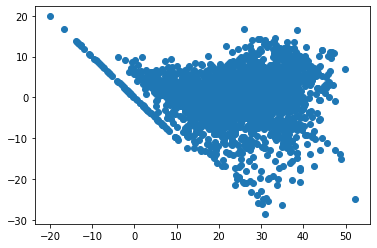

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

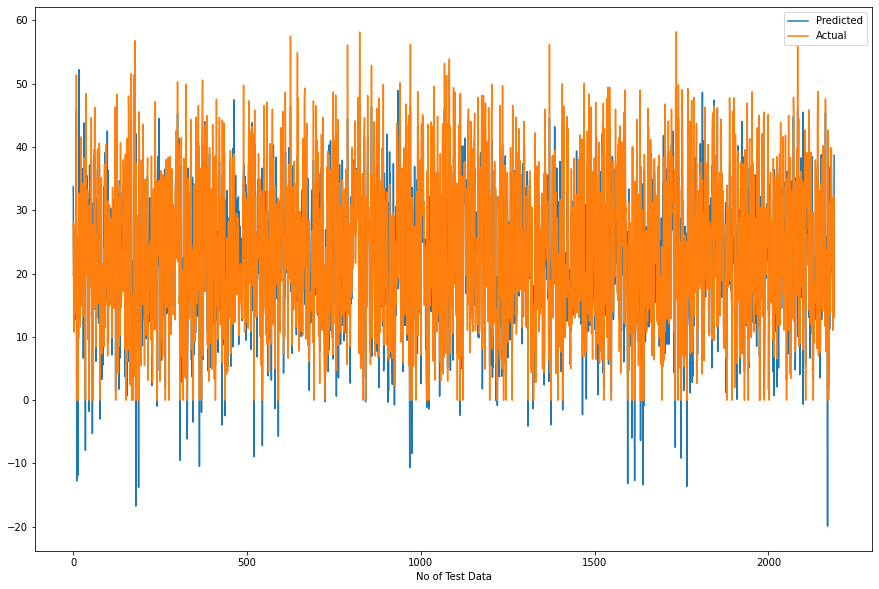

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### **8th Model Gradient Boosting Regressor with GridSearchCV**

##### Hyperparameter tuning

Let's try adjusting some hyperparameters to see if our model performs better before moving on to the next models.

The process of selecting the best hyperparameters for a learning algorithm is known as hyperparameter tuning. A model argument is a hyperparameter whose value is set before learning begins. Hyperparameter tuning is the key to machine learning algorithmic success.

##### Using GridSearch CV

GridSearch CV makes it easier to fit the model to the training set by looping through predefined hyperparameters. Thus, in the end, we can select the optimal hyperparameters from the list.

##### Provide the range of values for chosen hyperparameter

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.23
1,temperature,0.32
2,humidity,0.16
3,visibility,0.01
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.23
2,humidity,0.16
5,functioning_day,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
3,visibility,0.01
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

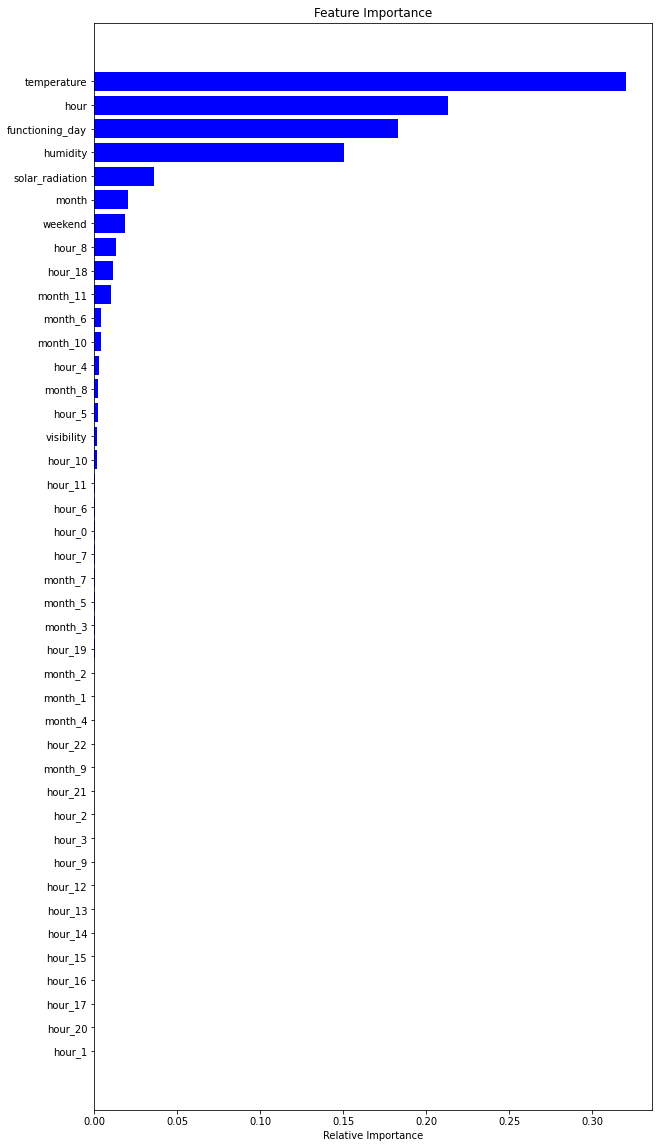

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **8. Final Verdict**

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R square is calculated by replacing the calculated prediction with the mean by dividing the sum of the squared prediction error by the total sum of the squares. The R Square worth reaches from 0 to 1, and a higher worth shows that the forecast and genuine worth are all the more firmly adjusted.


The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count. 

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Random Forest model because, first and foremost, I need a better prediction for the number of rented bikes, and time is not a constraint because the data is different from that of Zomato or Uber, where real-time booking must be completed more quickly. As a result, various linear models, decision trees, Random Forest, and Gradient Boost techniques were used to improve accuracy. I would like to compare their evaluation metrics, which are provided here.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

Training set                                             \
                             Model    MAE     MSE   RMSE R2_score Adjusted R2   
0               Linear regression   4.630  37.500  6.120    0.760        0.75   
1                Lasso regression   6.790  83.870  9.160    0.460        0.45   
2                Ridge regression   4.632  37.499  6.124    0.757        0.75   
3          Elastic net regression   5.740  57.470  7.580    0.630        0.62   
4        Dicision tree regression   4.526  39.607  6.293    0.744        0.74   
5        Random forest regression   0.820   1.810  1.350    0.990        0.99   
6    Gradient boosting regression   2.854  16.313  4.039    0.894        0.89   
7  Gradient Boosting gridsearchcv   1.760   7.561  2.750    0.951        0.95   

                          Test set                                             
                             Model    MAE     MSE   RMSE R2_score Adjusted R2  
0               Linear regression   4.780  39.750  6.310    0.750        0.74  
1                Lasso regression   6.944  85.679  9.256    0.453        0.44  
2                Ridge regression   4.780  39.752  6.305    0.746        0.74  
3      Elastic net regression Test  5.860  58.490  7.650    0.630        0.62  
4        Dicision tree regression   4.830  45.820  6.770    0.710        0.70  
5        Random forest regression   2.170  12.240  3.500    0.920        0.92  
6    Gradient boosting regression   3.071  18.088  4.253    0.885        0.88  
7  Gradient Boosting gridsearchcv   2.220  12.233  3.498    0.922        0.92

For the following reasons, I would choose Random Forest.
* One of the best R2 scores for the Test Set (0.92) and the Training Set (0.99)
* Test RMSE and training RMSE were the lowest.
* Test MAE and Training MAE are the lowest.
* A single model that can be used on both business days and weekends.
* Lowest Overfit (the Train RMSE is more comparable to the Test RMSE).
* Lesser opportunity to prepare because of a lesser number of elements.
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.0 MB/s 


In [ ]:
# package used to calculate Shap values
import shap 

# Create object that can calculate shap values
explainer = shap.Explainer(rf_model)

# Calculate Shap values
shap_values = explainer(X_test)

A force plot is one way to show SHAP values visually. These provide us with information comparable to that of a waterfall plot depicting the contribution of the geological features and their relationship to one another in a straight line. Assuming one worth of builds res will pack. As you can see, our starting point is the same, which is -1.94.

Individual predictions can be easily interpreted using force and waterfall plots. We need to combine the SHAP values to comprehend how our model generally makes predictions. Using a decision plot is one way to accomplish this. The code that was used to generate the decision plot for the first ten abalones is shown above.

The plot has ten lines, one for each abalone, as can be seen. They all end with their final predicted number of rings and begin with the same base value of -1.94. The SHAP value for each feature indicates the movement on the x-axis as you ascend from that feature on the y-axis. In the end, this provides the same data as a waterfall plot, with the exception that we can now see it for multiple observations.

We can already observe some trends with only ten observations. For instance, some of the lines appear to zigzag at the chart's top. The prediction for these observations is positive (SHAP) for the shucked weight and negative (SHAP) for the shell weight and whole weight. To put it another way, the prediction is affected in different ways by these features. At the point when we take a gander at plot 5 — beeswarm, we will see that this is the situation for the model overall.

An issue with this outline is that we can't utilize it to picture all the SHAP values immediately. It will become too cluttered as the number of observations increases, making it difficult to comprehend the model's operation. We can only explain the SHAP values for a small number of observations.

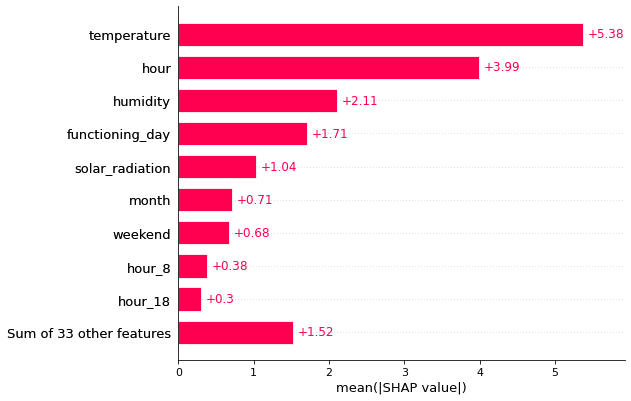

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

A mean SHAP plot is yet another approach to aggregating the values. We find the mean of all observations' absolute SHAP values for each feature. We accept the outright qualities as we don't maintain that positive and negative qualities should balance one another. The bar graph above is what we have at the end. We can see that the feature with the largest mean SHAP, shell weight, is represented by a single bar.

Positive and negative SHAP values for features with large mean SHAP values will typically be large. To put it another way, these are the characteristics that significantly influence the predictions made by the model. This plot can be used in the same way that a feature importance plot can be used. That is, to emphasize characteristics that are crucial to a model's predictions. The fact that it reveals nothing about the nature of the relationship between the target variable and features is a problem.

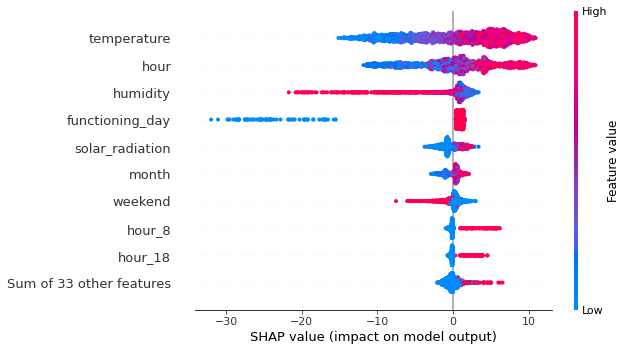

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

The beeswarm plot is our final grouping. As found in Figure, this is a plot of all the SHAP values. The y-axis features are used to group the values. For each gathering, the shade the not entirely settled by the worth of a similar element (for example higher element values are redder). The mean SHAP values determine the order of the features.

Some of the problems from the previous plots are addressed in this one. Dissimilar to the choice plot, we can plot every one of the perceptions yet has clear translations. It can be used to emphasize important relationships, like mean SHAP. We can also begin to comprehend these relationships' nature. Take, for instance, Day_1call_duration, where you can see that the SHAP values rise in tandem with the feature value.

##**9. Summary and Conclusion**

#### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

####**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***